In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
# imports the barometric data file, only the date/time, and level columns

all_baro_data_in_m = pd.read_csv('total_baro_data/all_baro_data_in_m.csv')
all_baro_data_in_m['DT'] = pd.to_datetime(all_baro_data_in_m['Date'] + ' ' + all_baro_data_in_m['Time'])
all_baro_data_in_m['baro LEVEL'] = all_baro_data_in_m['LEVEL']
all_baro_data_in_m = all_baro_data_in_m.loc[:, ['DT', 'baro LEVEL']]
all_baro_data_in_m

DT  baro LEVEL
0     2018-07-17 17:00:00    8.274283
1     2018-07-17 17:10:00    8.273427
2     2018-07-17 17:20:00    8.273192
3     2018-07-17 17:30:00    8.273019
4     2018-07-17 17:40:00    8.273039
...                   ...         ...
41241 2019-11-11 09:50:00   10.307738
41242 2019-11-11 10:00:00   10.307024
41243 2019-11-11 10:10:00   10.307738
41244 2019-11-11 10:20:00   10.308961
41245 2019-11-11 10:30:00   10.308451

[41246 rows x 2 columns]

File name: cut_EEF-1_2018_0717_0725.csv


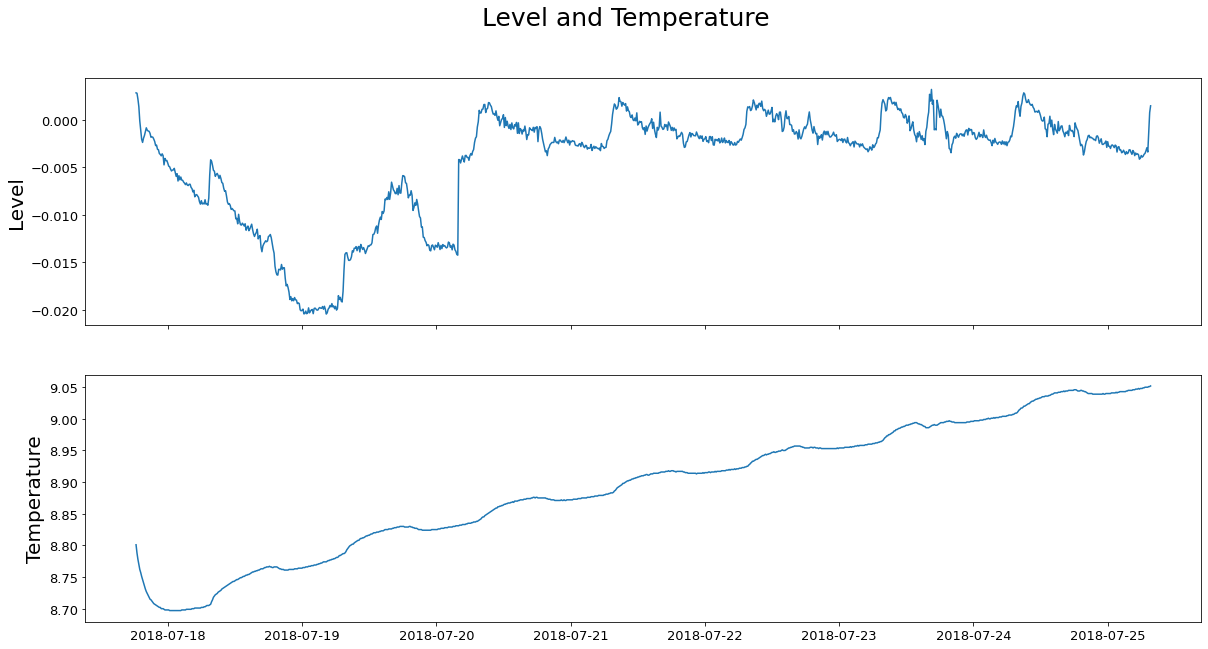

File name: cut_EEF-1_2018_0727_0824.csv


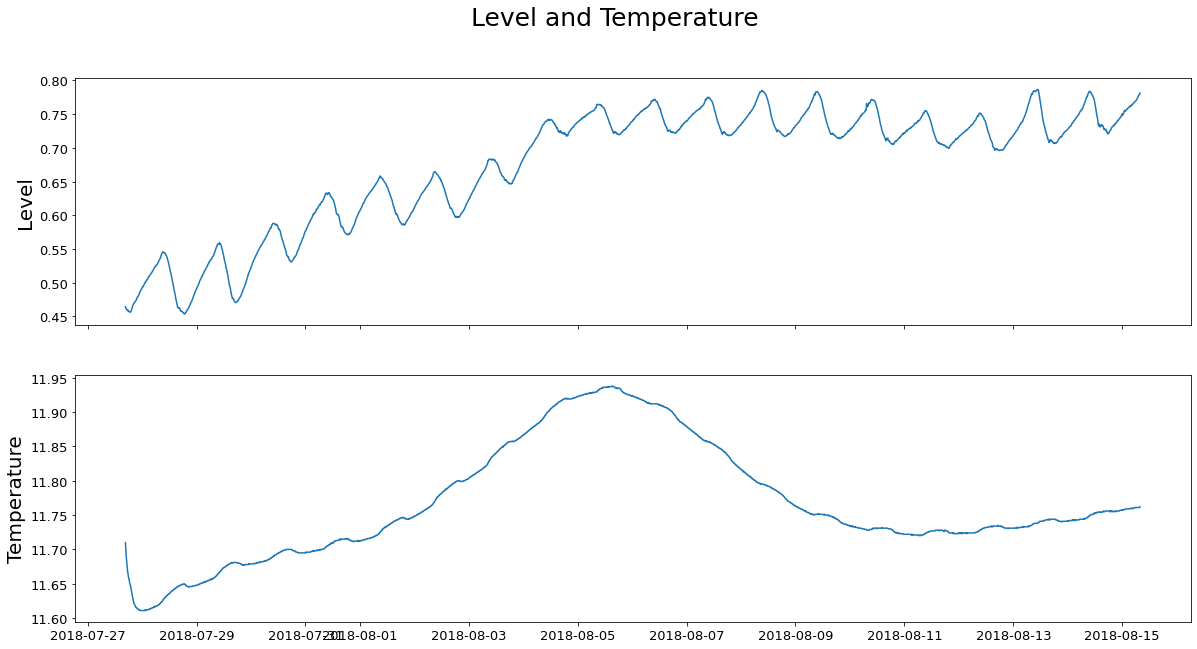

File name: cut_EWR-1_2018_0826_0929.csv


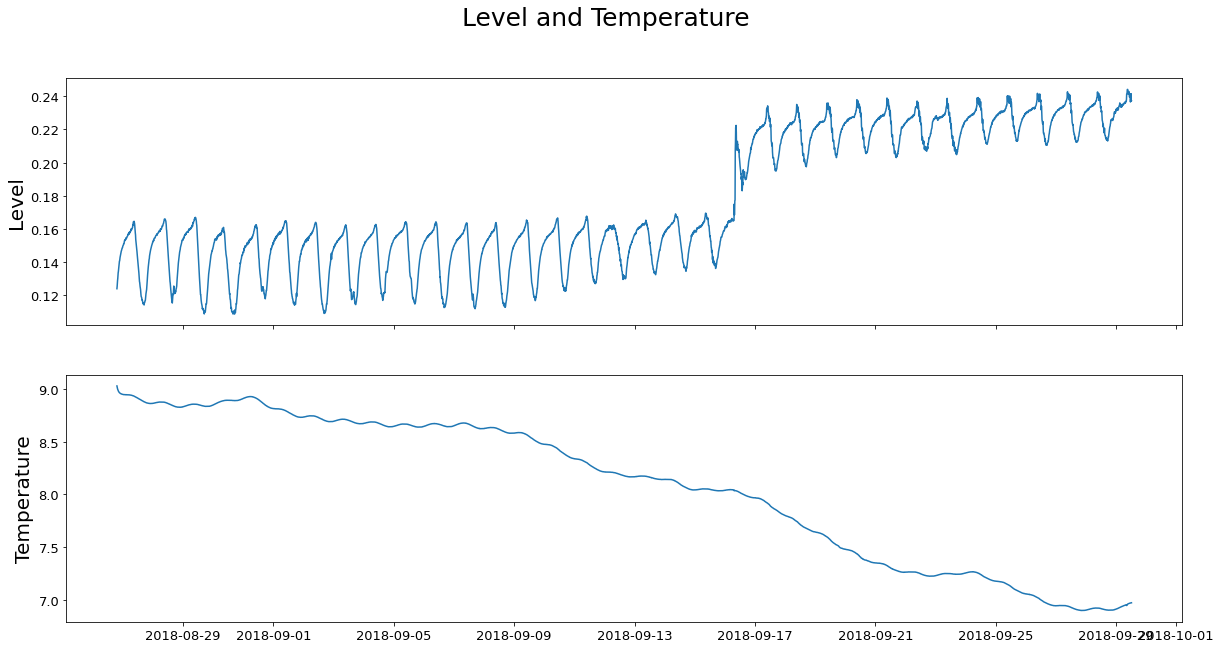

File name: cut_KWF-1_2018_0824_0826.csv


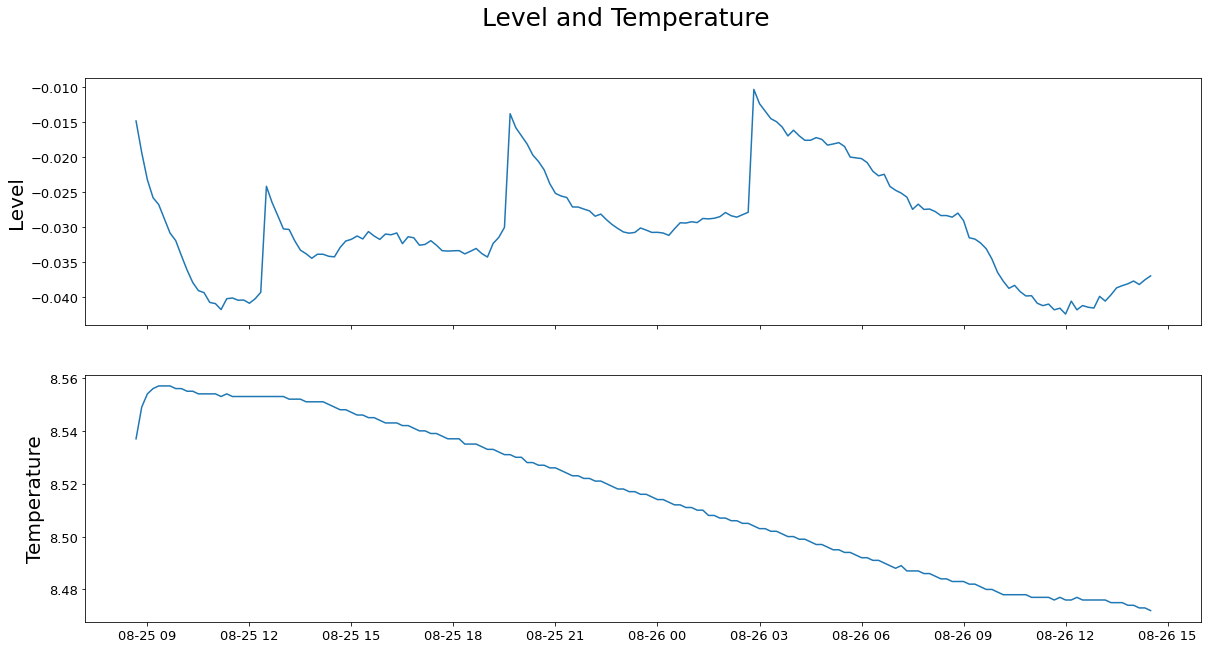

File name: cut_KWF-1_2018_0725_0727.csv


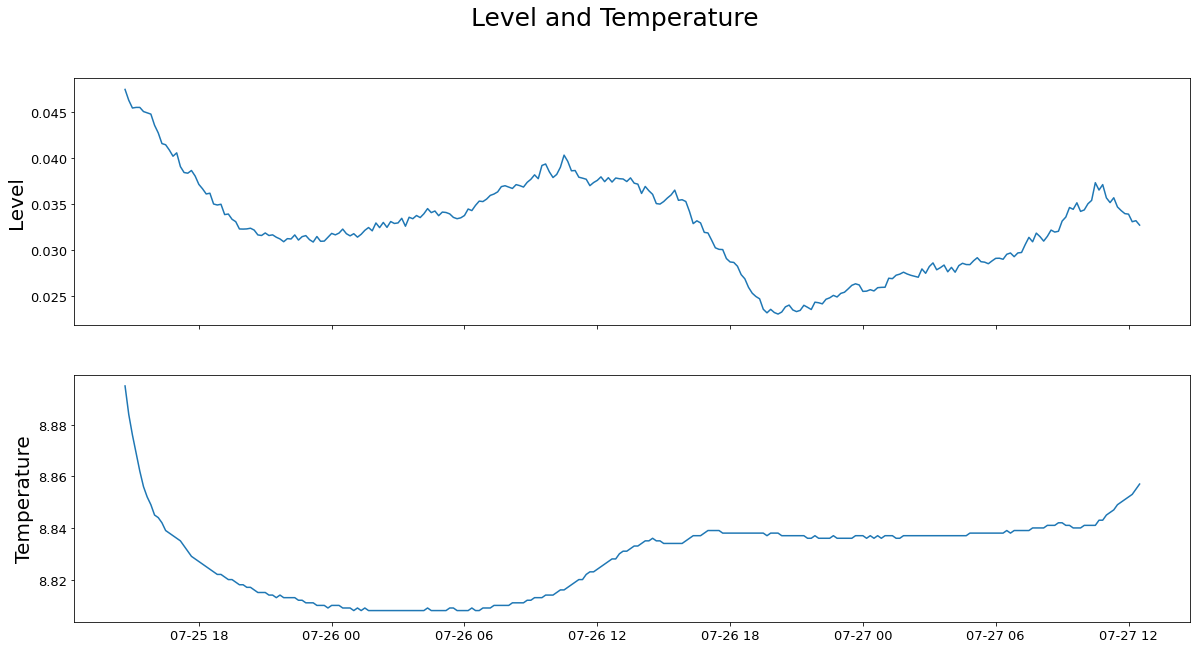

File name: cut_KER-1_2018_0725_0727.csv


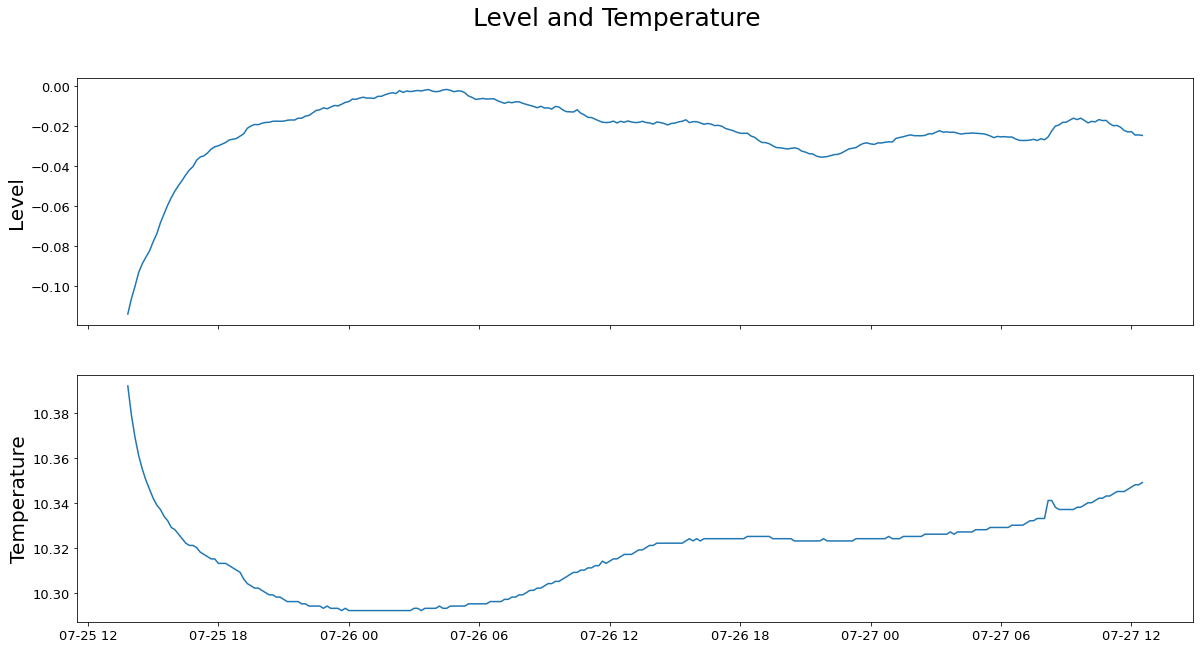

File name: cut_KHF-1_2018_0929_1001.csv


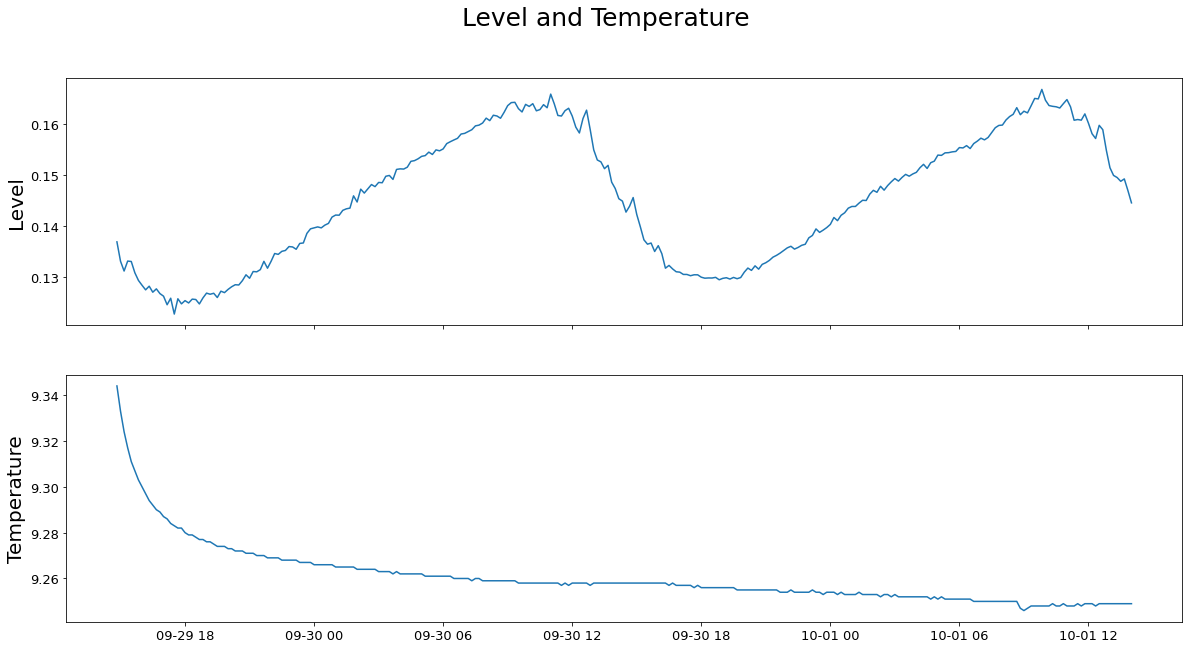

File name: cut_KFR-XE1S_2018_0725_0727.csv


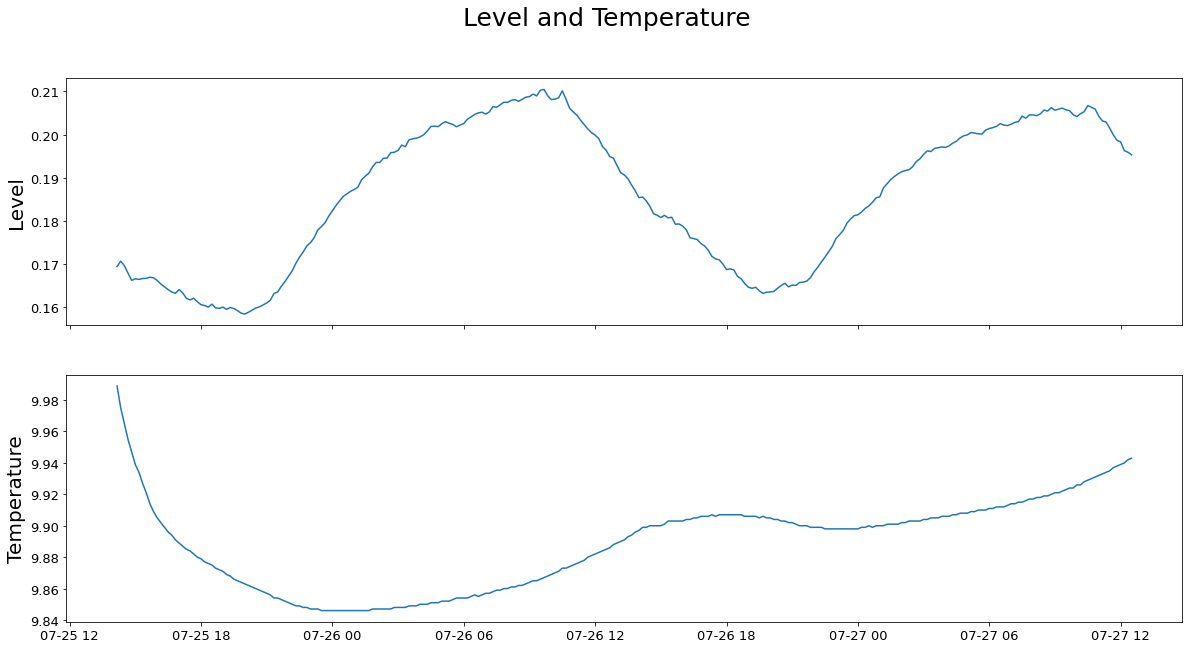

File name: cut_KFR-XE1S_2018_0824_0826.csv


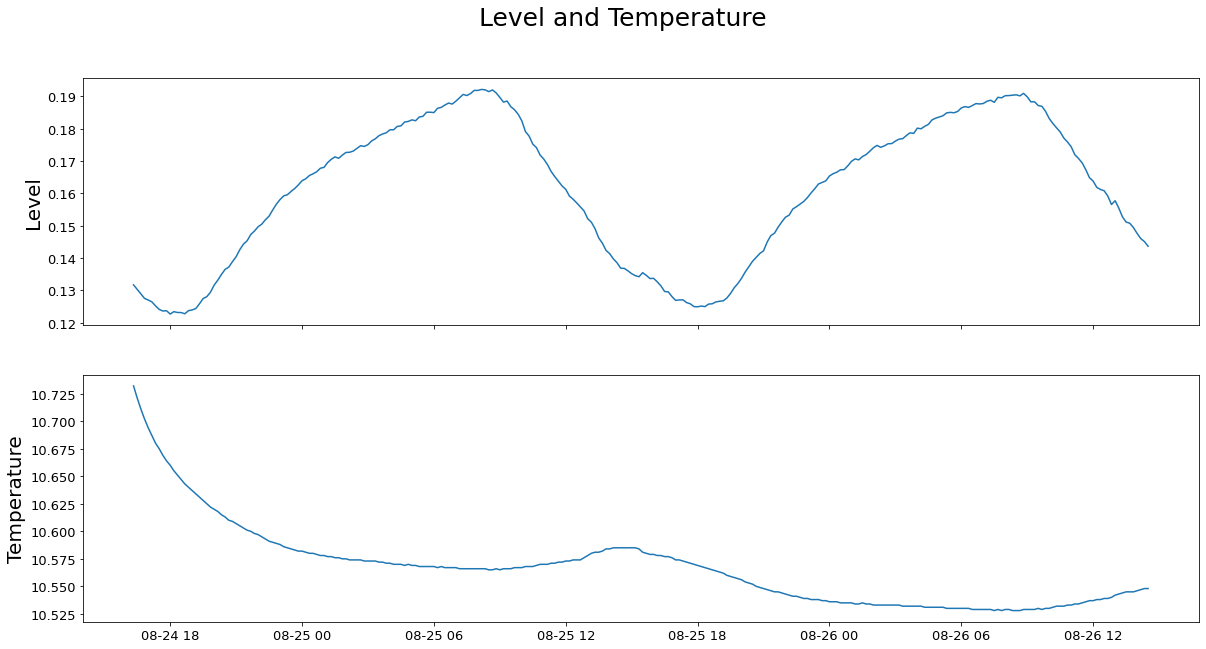

File name: cut_KFR-XE1S_2018_0715_0717.csv


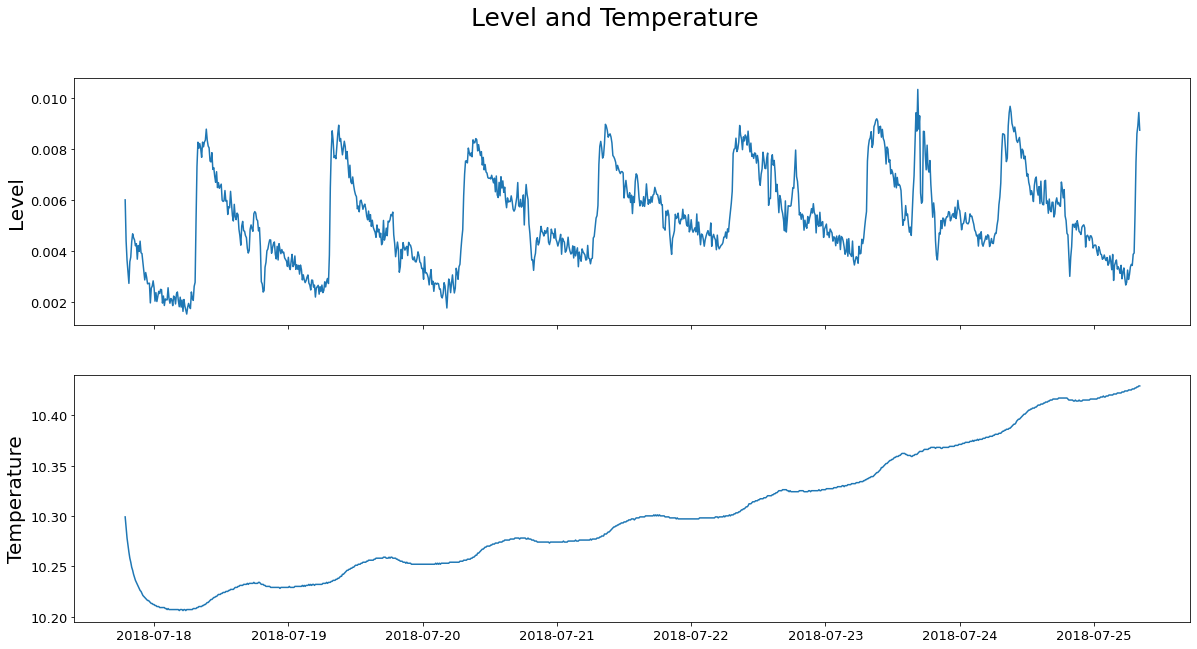

File name: cut_KHT-XE5S_2018_0715_0717.csv


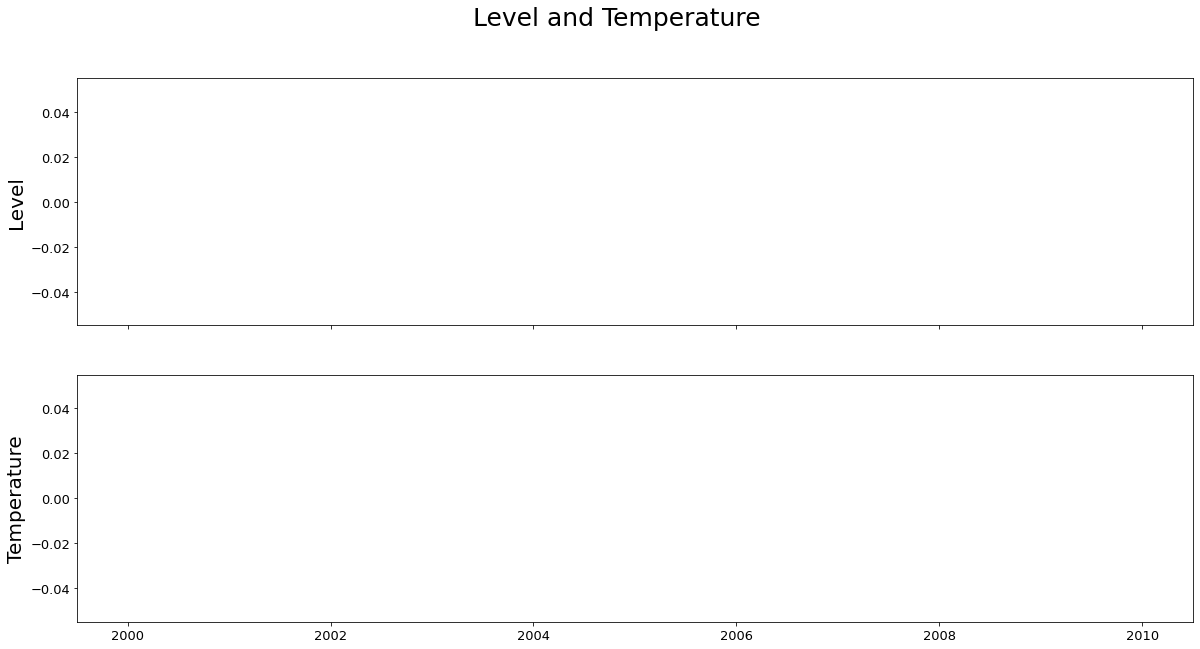

File name: cut_KER-1_2018_0824_0826.csv


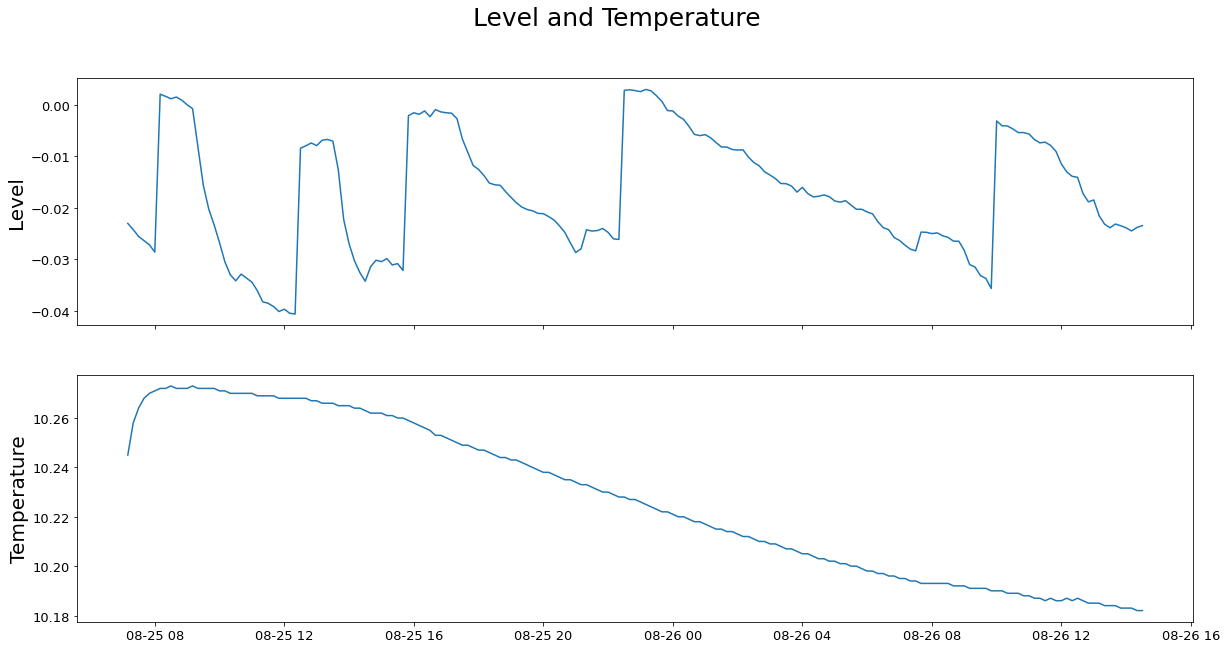

File name: cut_KHT-XE4S_2018_0824_0826.csv


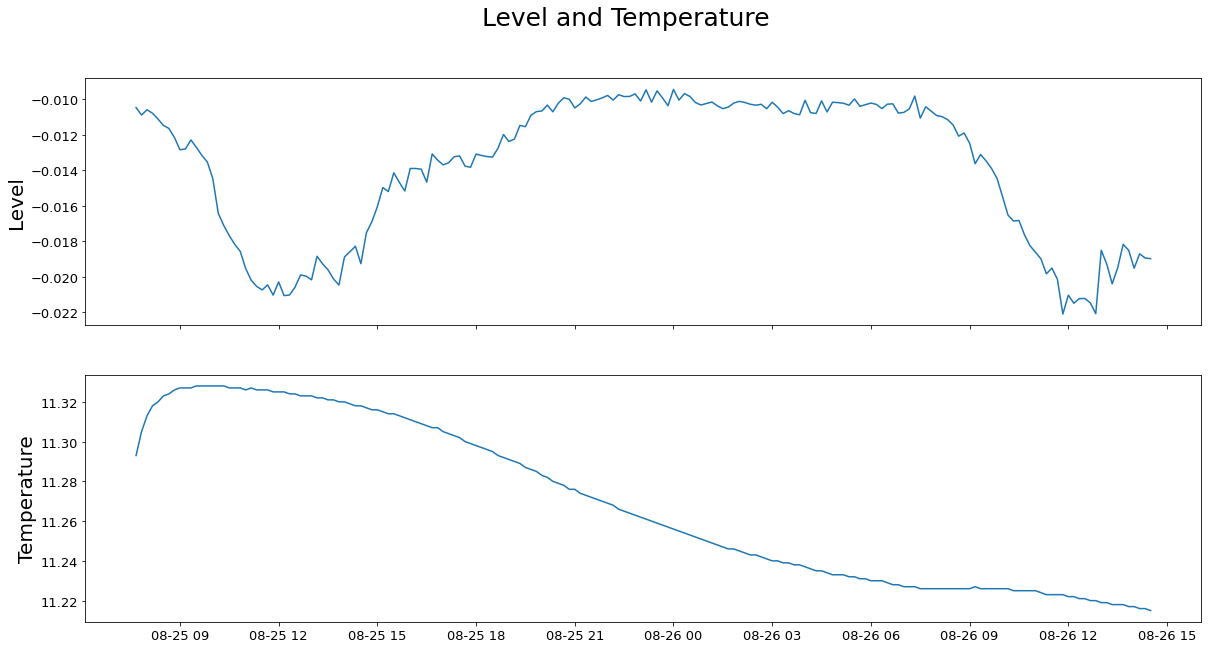

File name: cut_KHT-XE5S_2018_0725_0727.csv


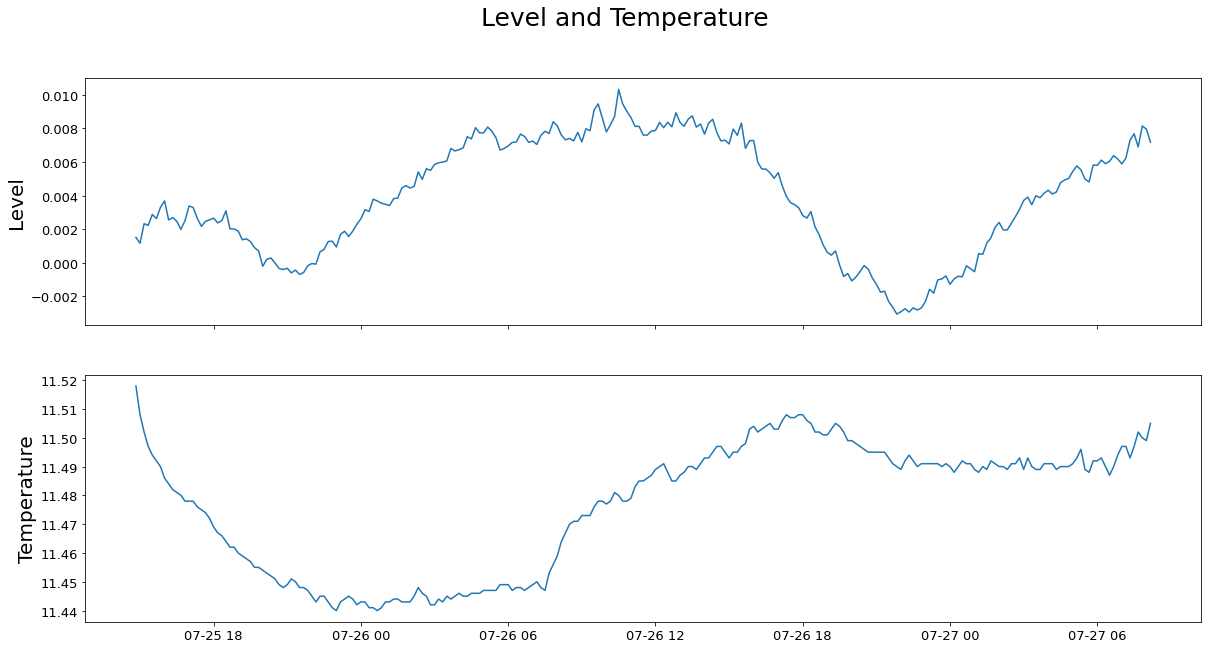

File name: cut_EWR-1_2018_1001_1118.csv


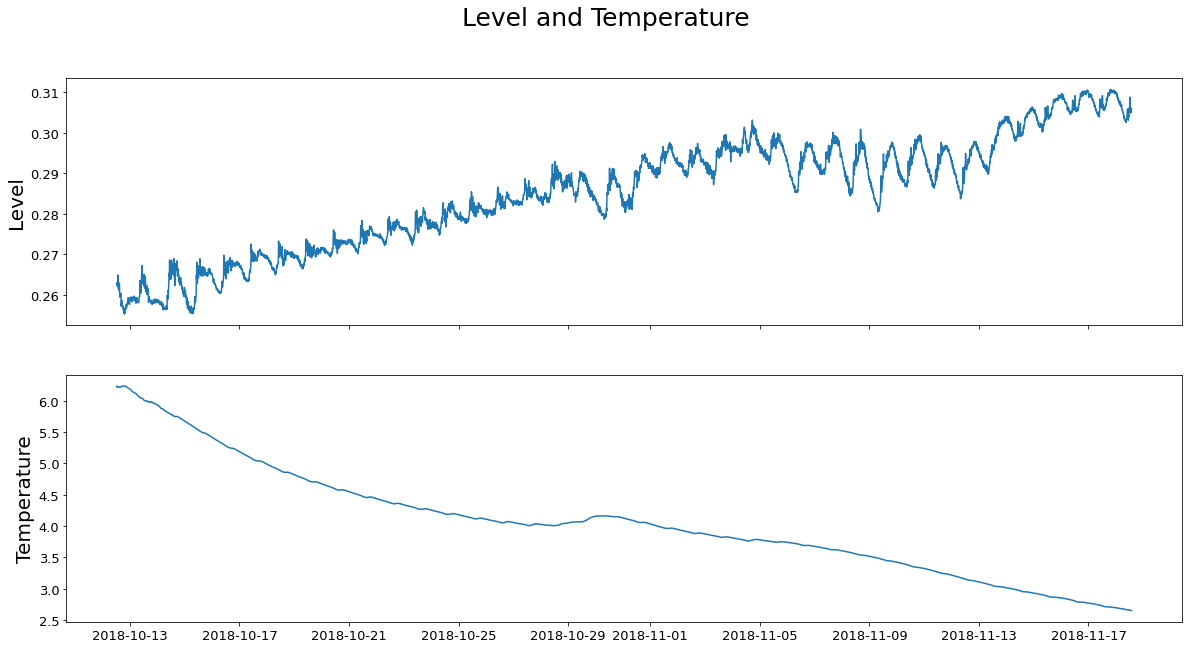

File name: cut_EWR-XA2S_2018_0717_0725.csv


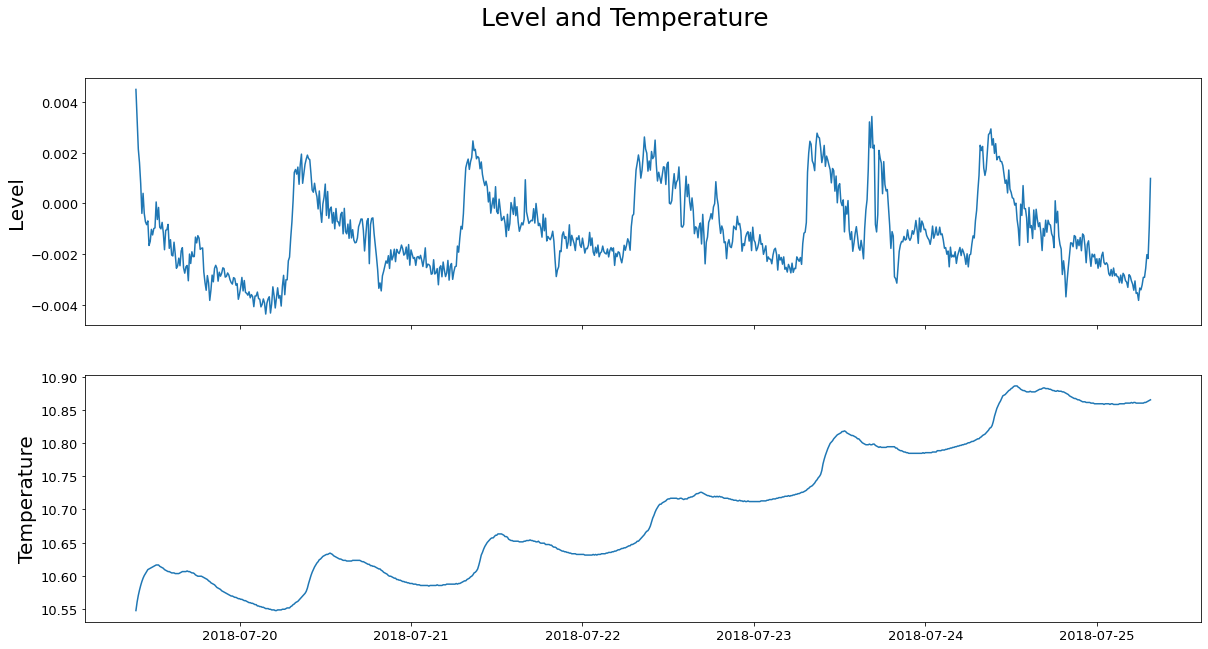

File name: cut_KEF-1_2018_0715_0717.csv


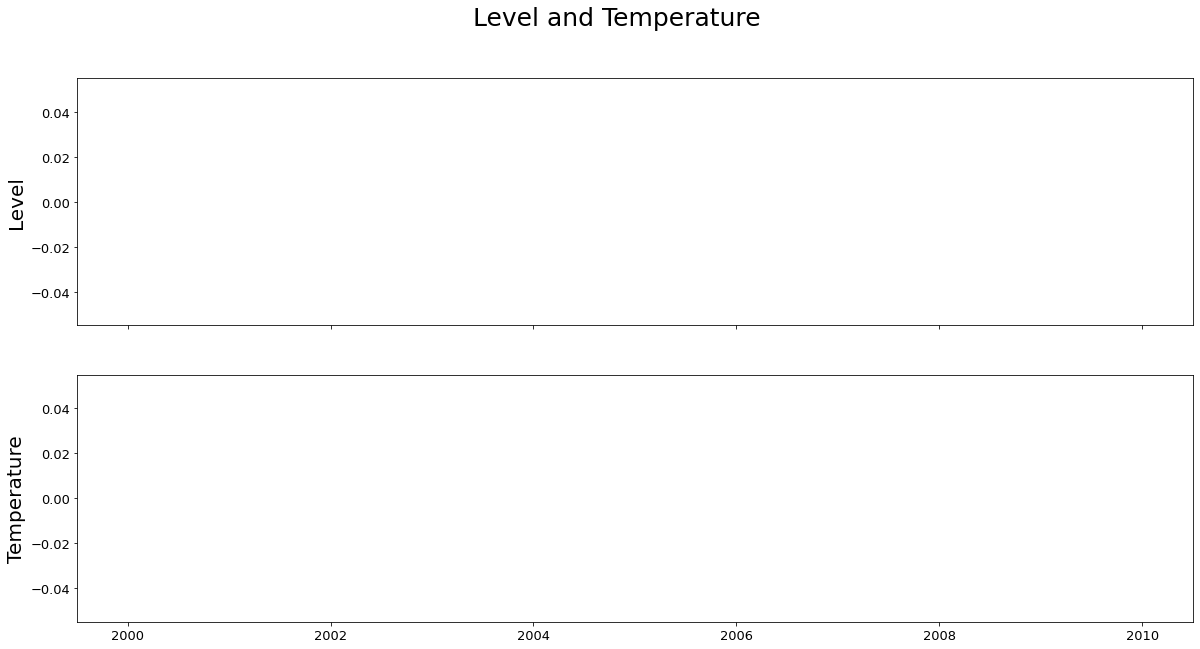

File name: cut_EWT-1_2018_0727_0824.csv


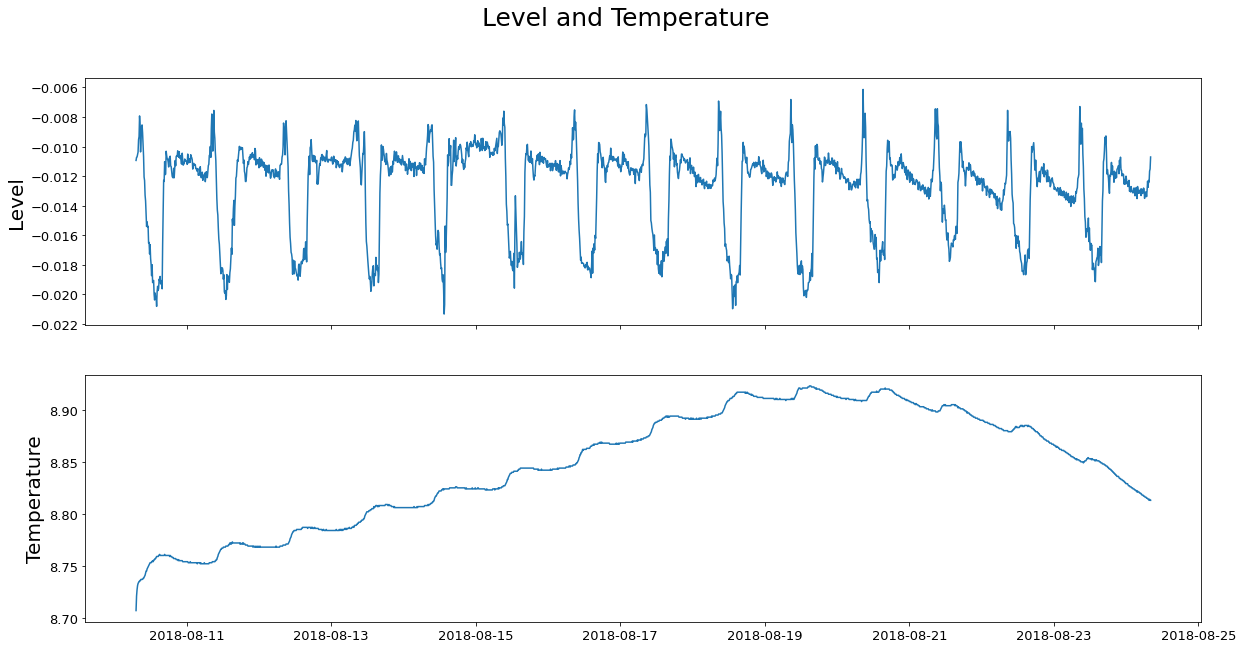

File name: cut_KEF-1_2018_0824_0826.csv


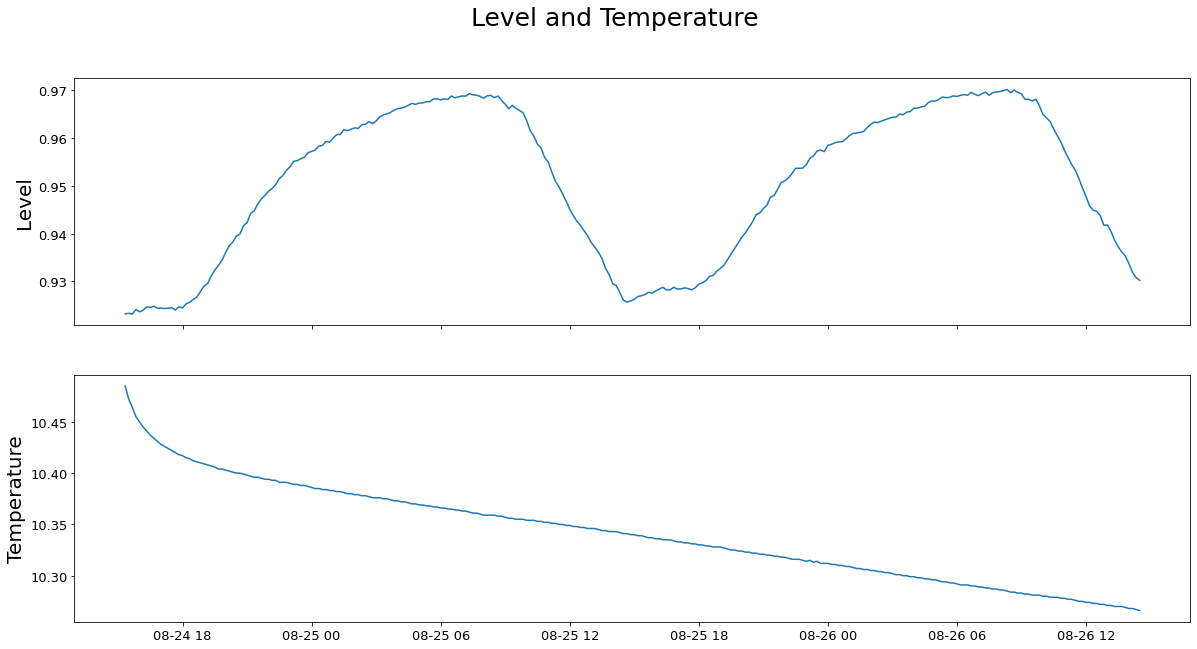

File name: cut_KEF-1_2018_0725_0727.csv


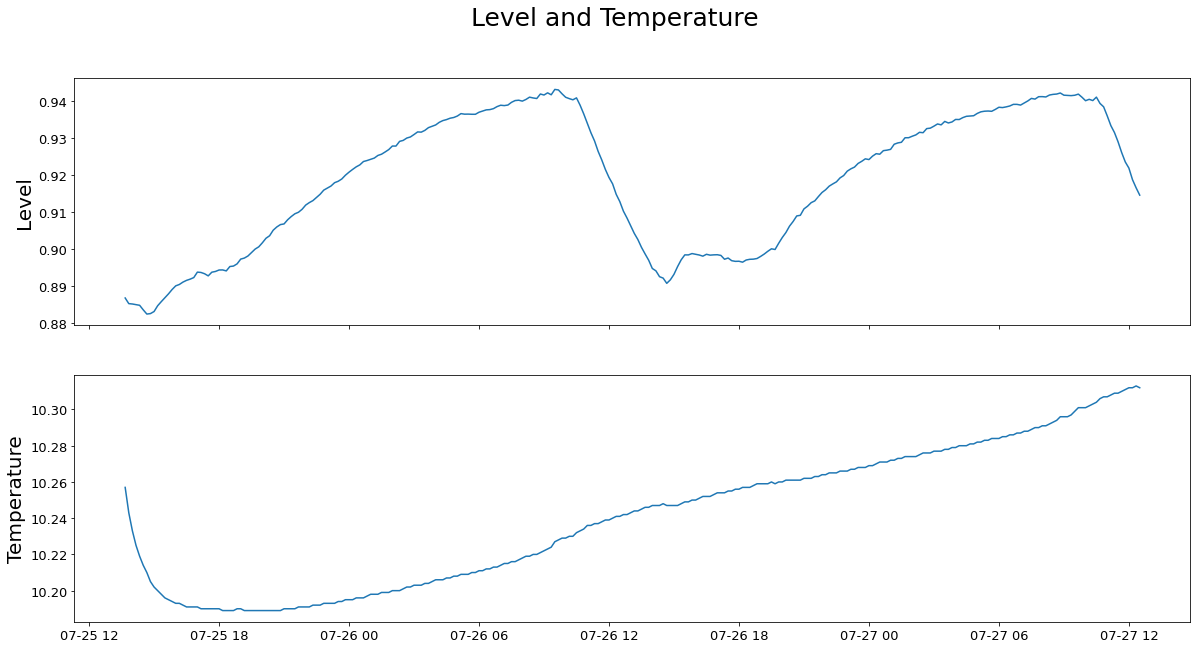

File name: cut_EEF-1_2018_0826_1118.csv


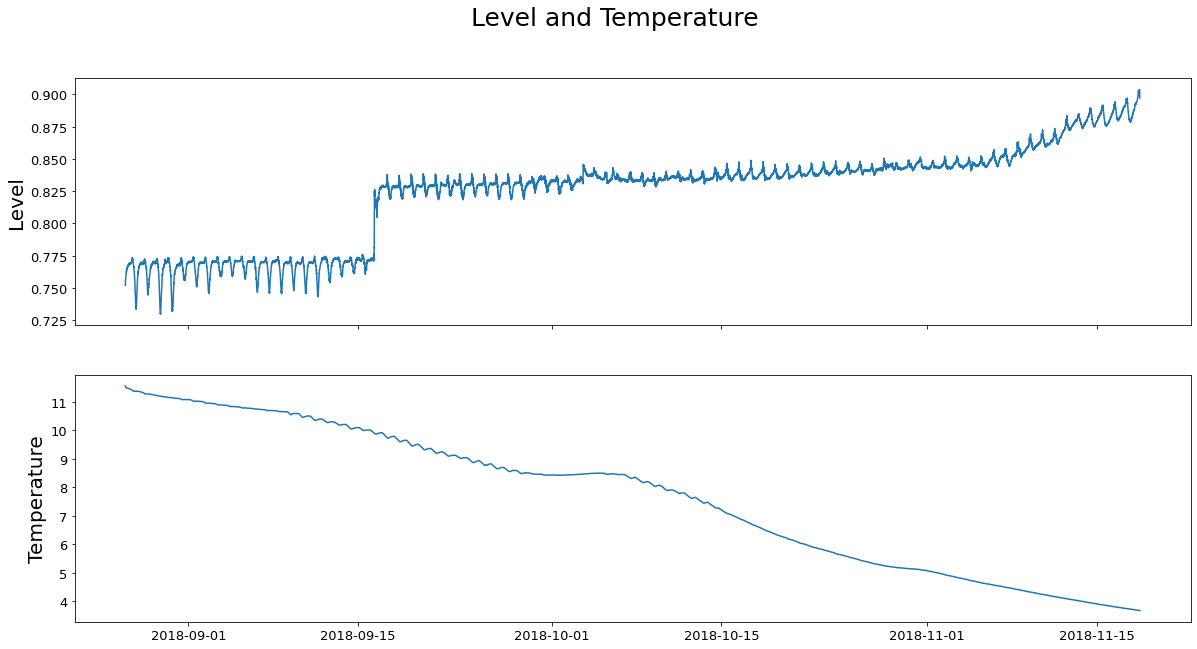

File name: cut_KEF-1_2018_0826_1118.csv


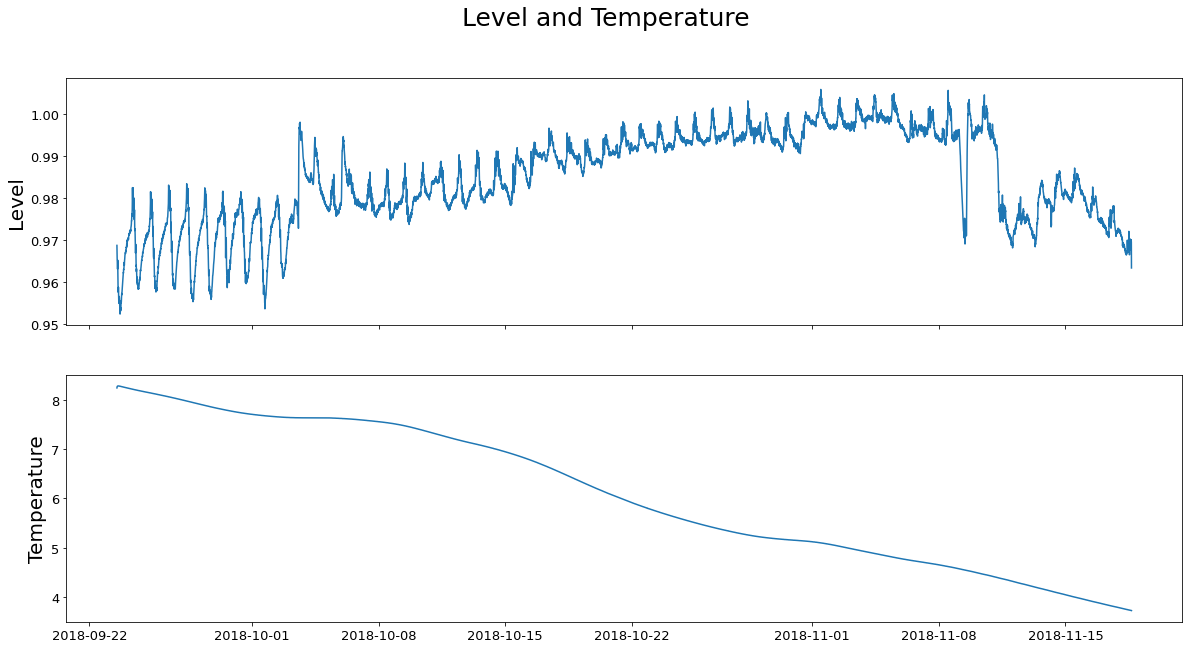

File name: cut_KER-1_2018_0715_0717.csv


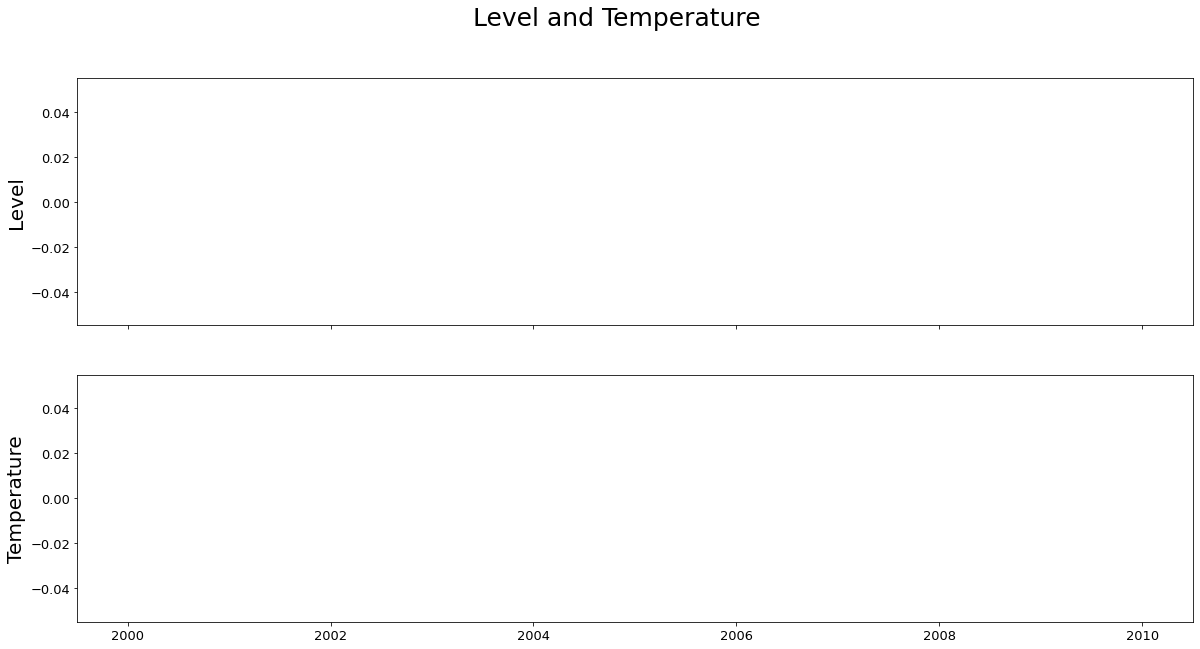

File name: cut_EET-1_2018_0717_0725.csv


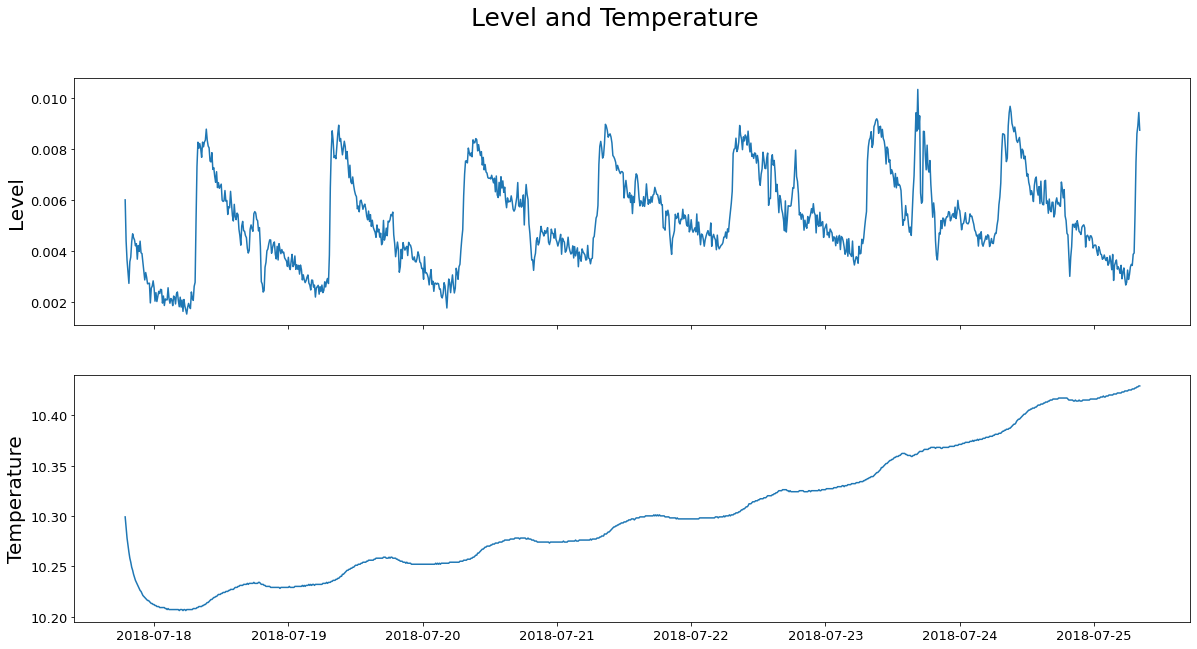

File name: cut_KER-1_2018_0715_0717_cut.csv


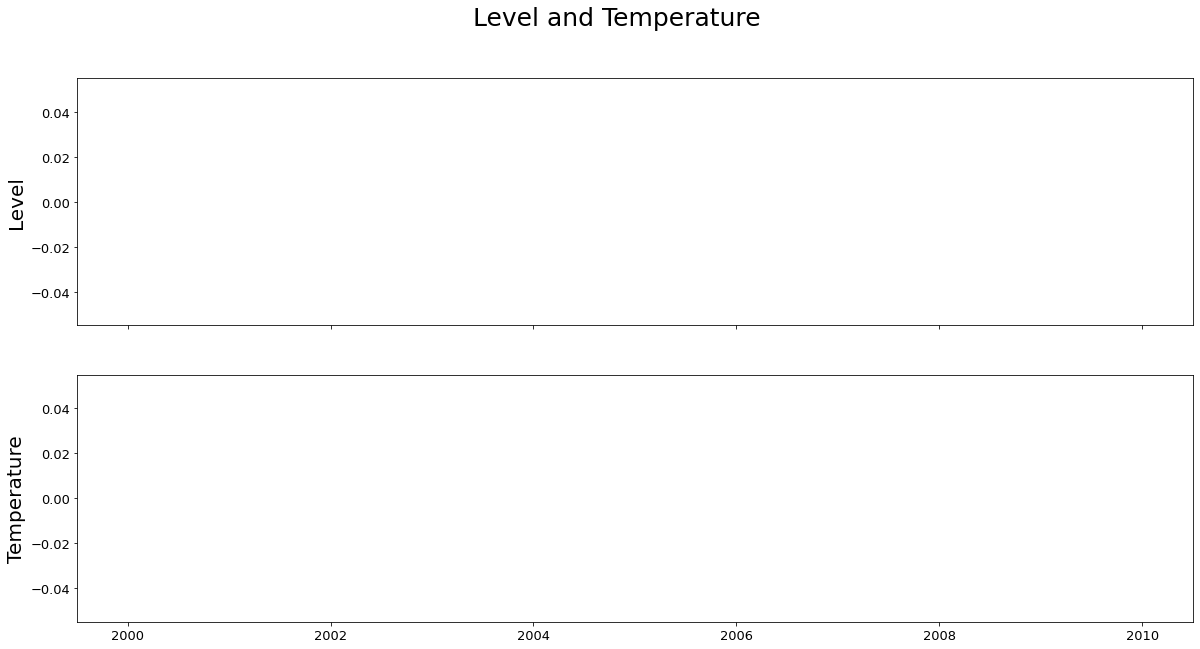

File name: cut_EER-1_2018_0717_0725.csv


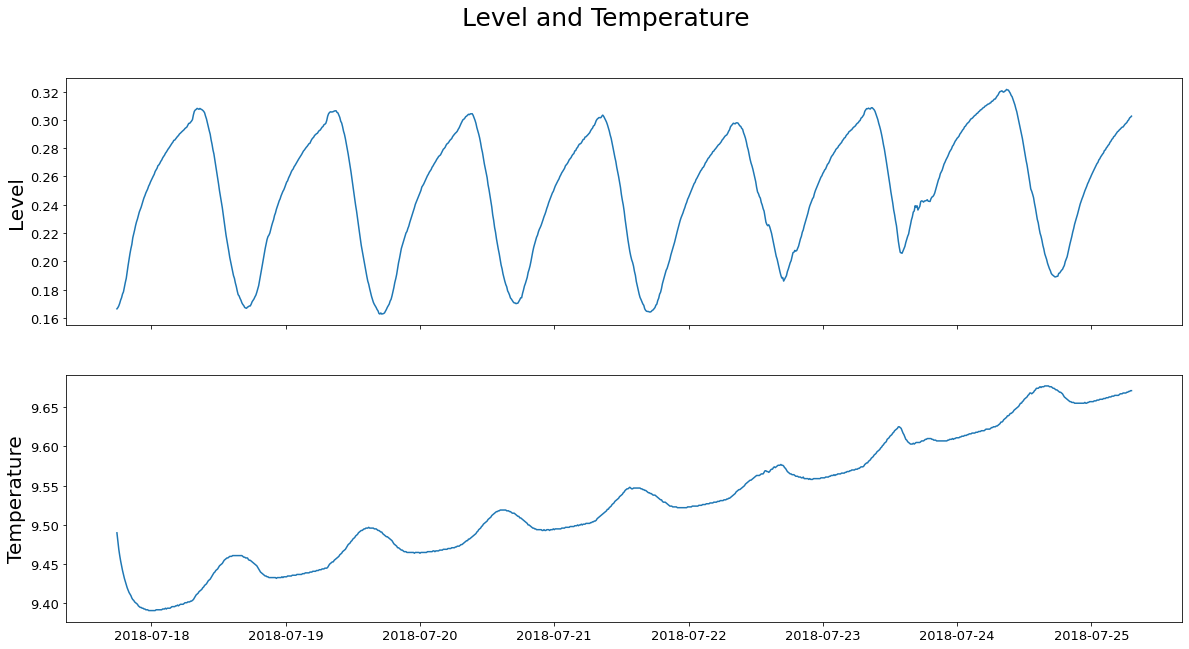

File name: cut_EER-1_2018_0826_1118.csv


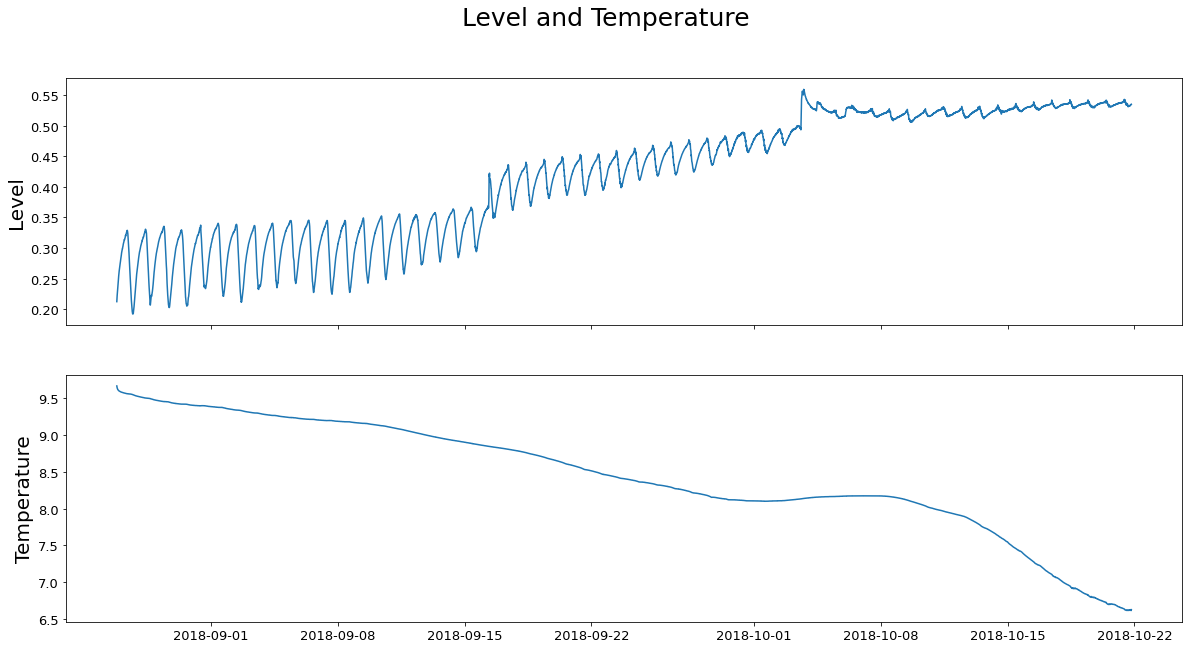

File name: cut_EER-1_2018_0727_0824.csv


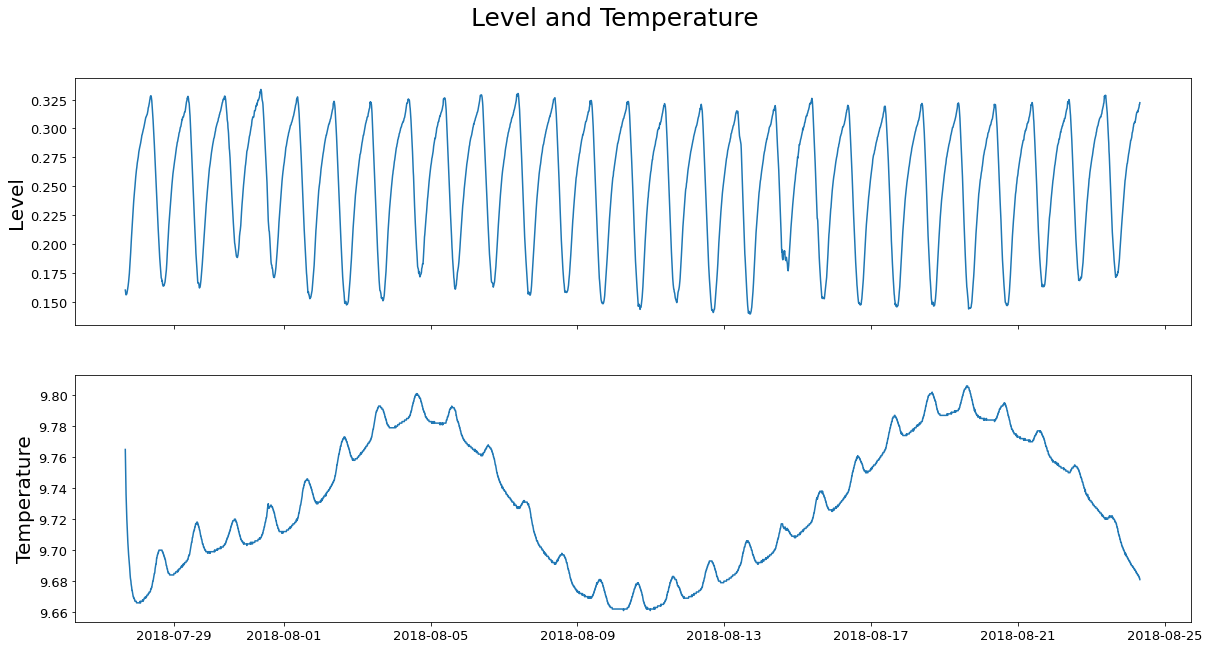

File name: cut_EHF-XA3S_2018_0727_0824.csv


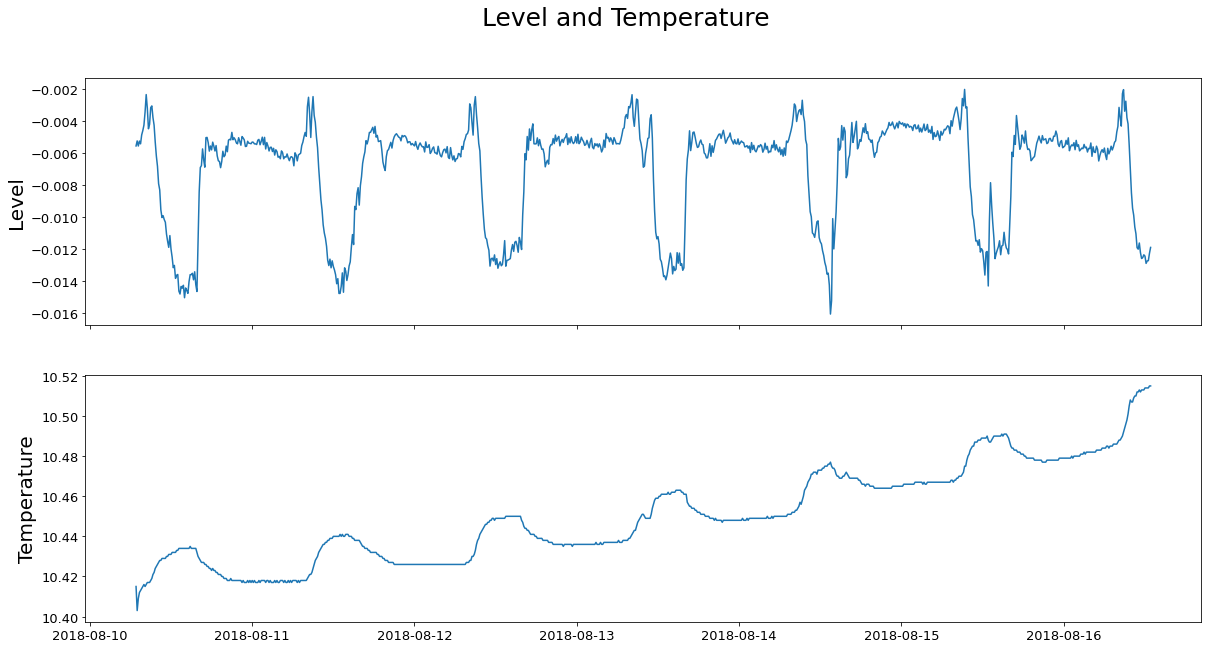

File name: cut_EHR-1_2018_0727_0824.csv


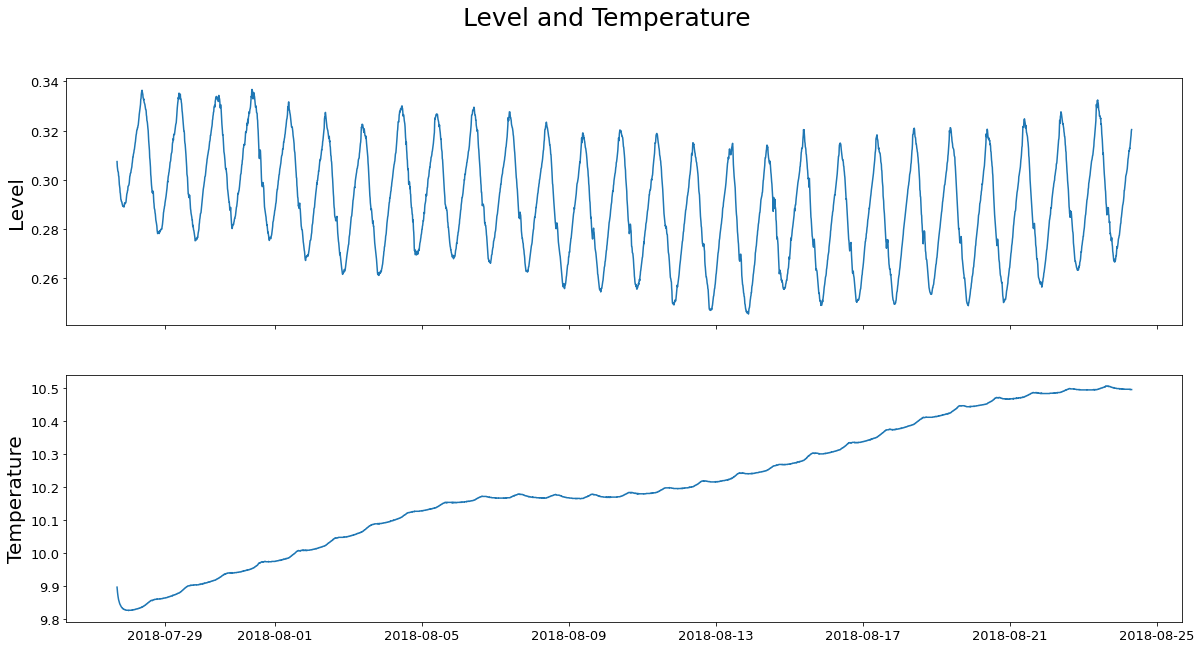

File name: cut_EHR-1_2018_0826_1118.csv


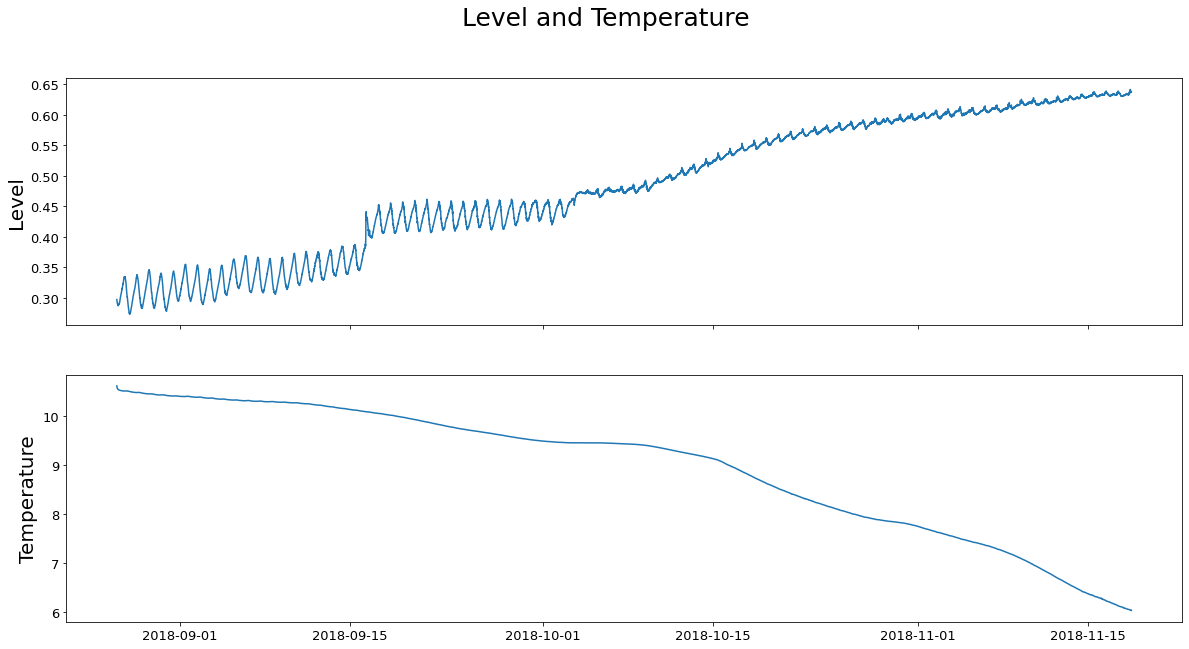

File name: cut_EWR-1_2018_0727_0824.csv


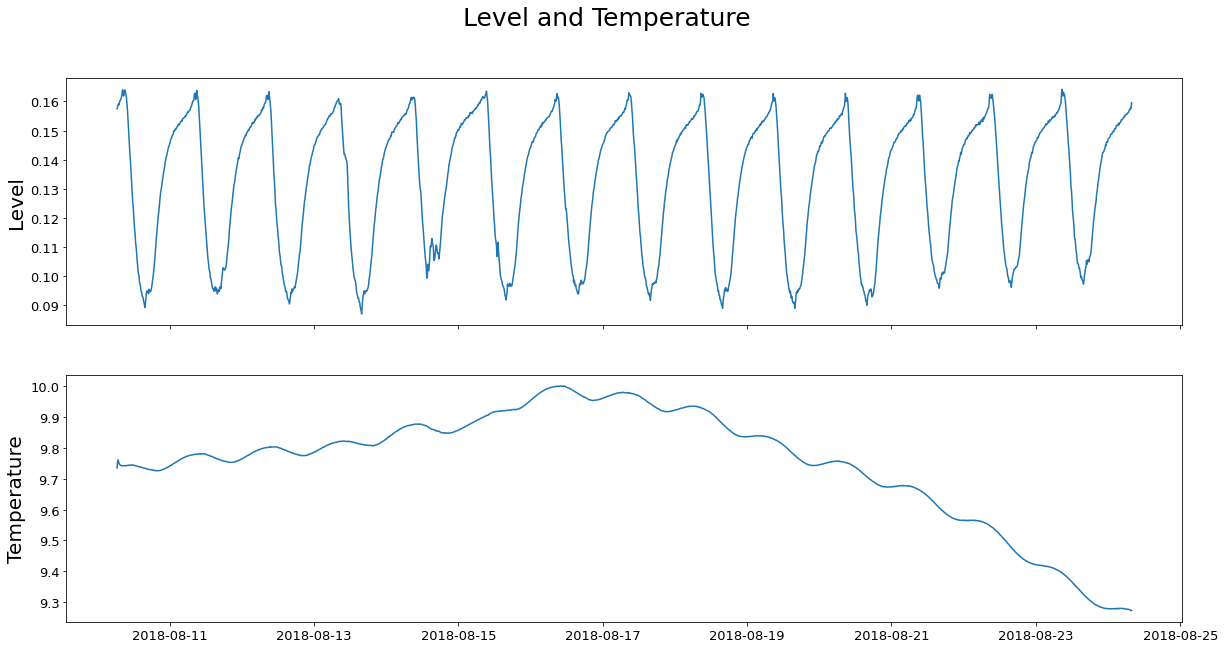

File name: cut_EHT-XA5S_2018_0717_0725.csv


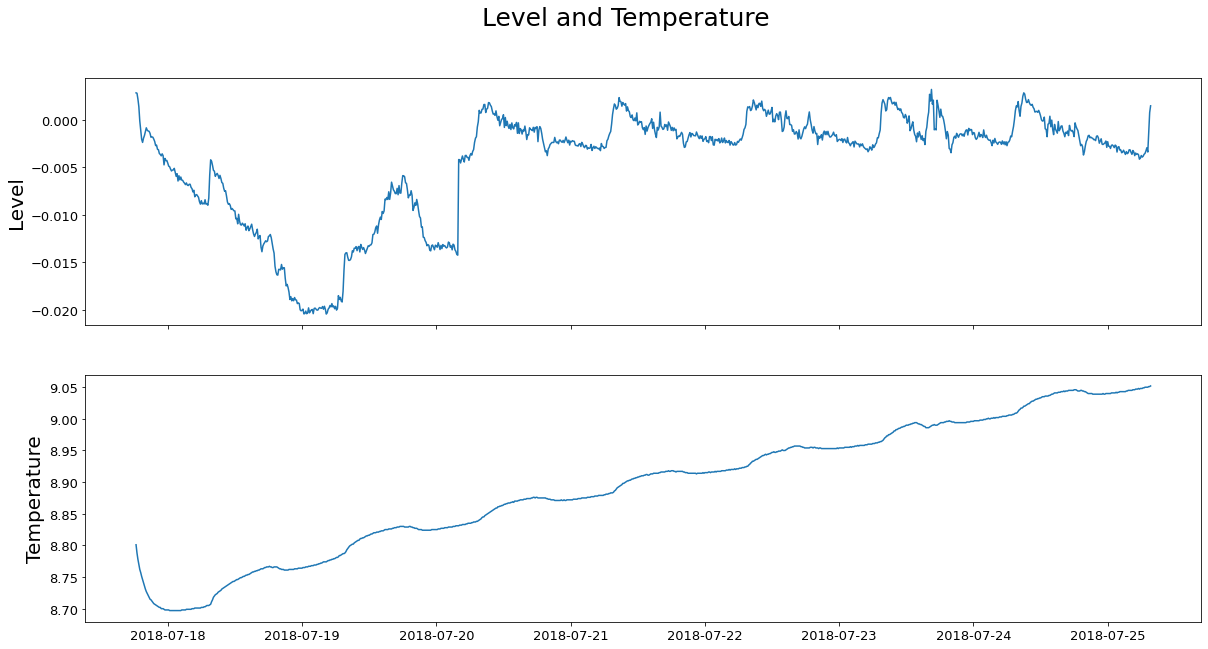

File name: cut_EWR-1_2018_0717_0725.csv


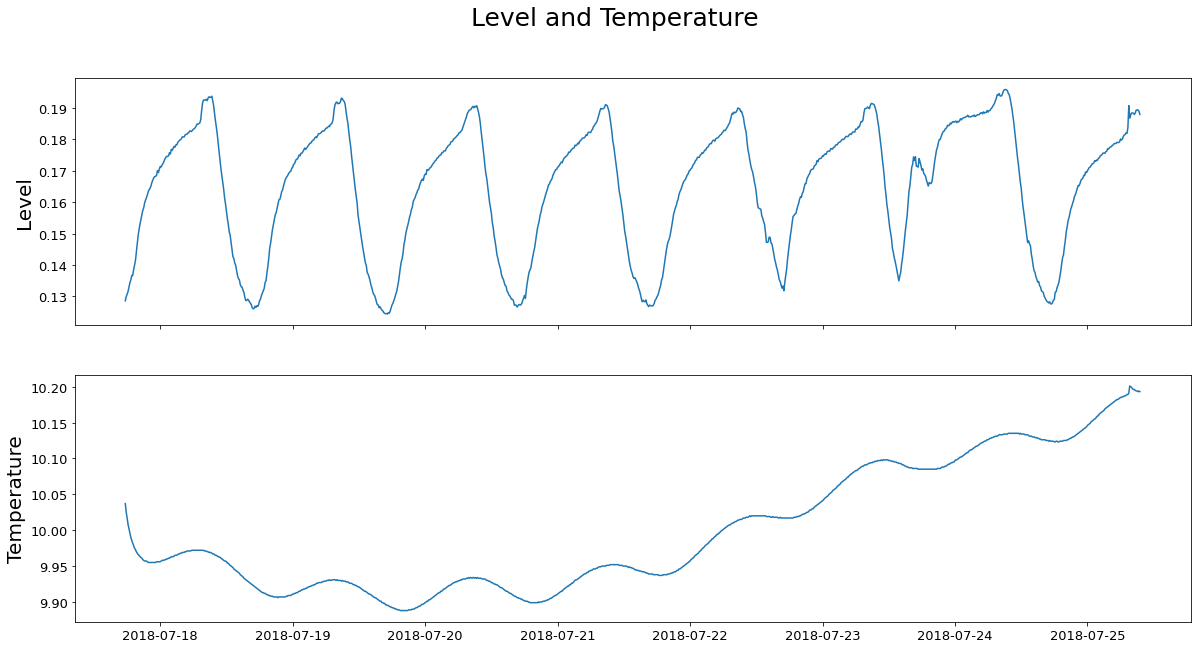

File name: cut_EWF-XA2S_2018_0717_0725.csv


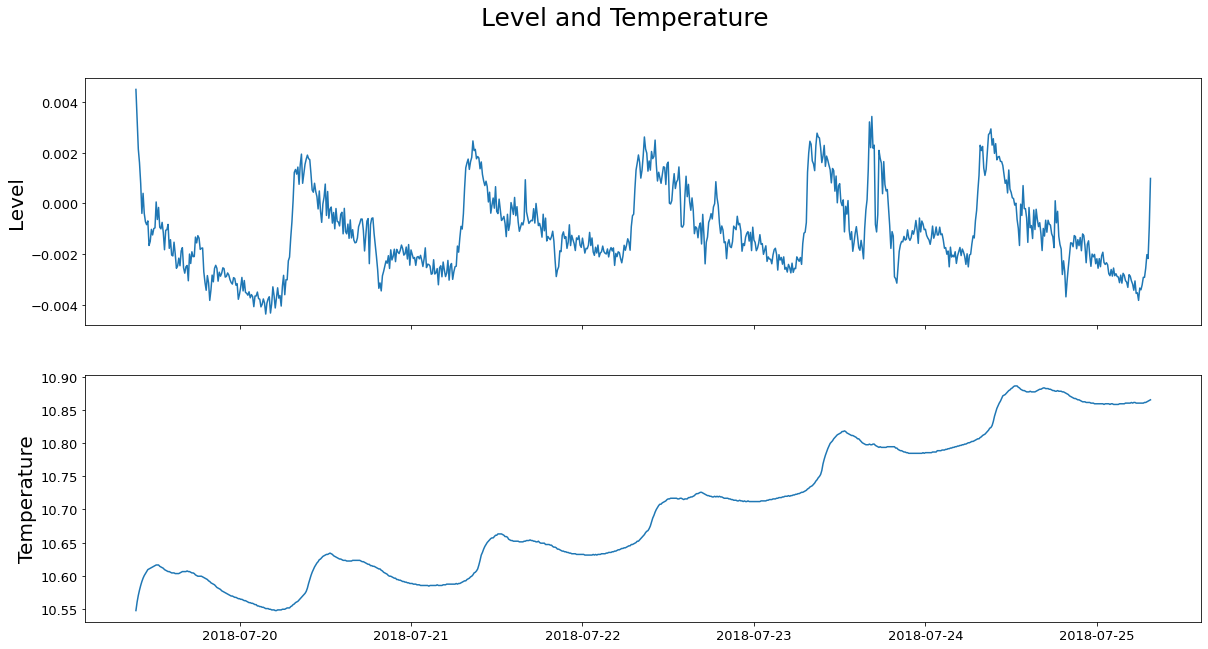

File name: cut_KWT-1_2018_0715_0717.csv


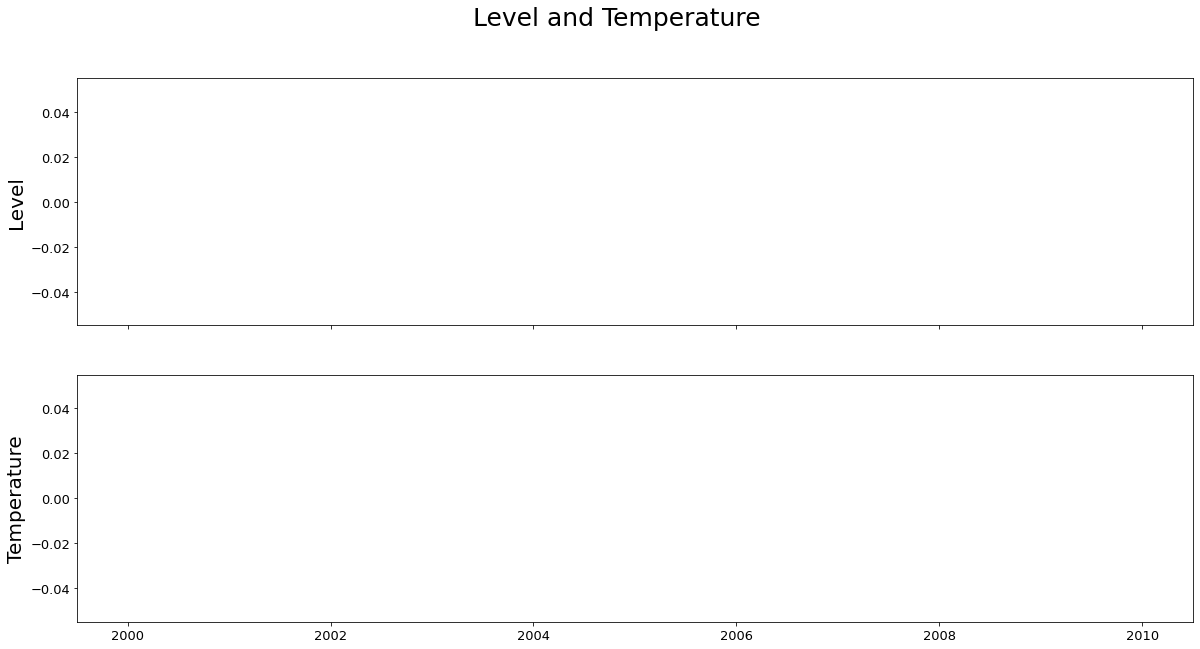

File name: cut_KWF-1_2018_0929_1001.csv


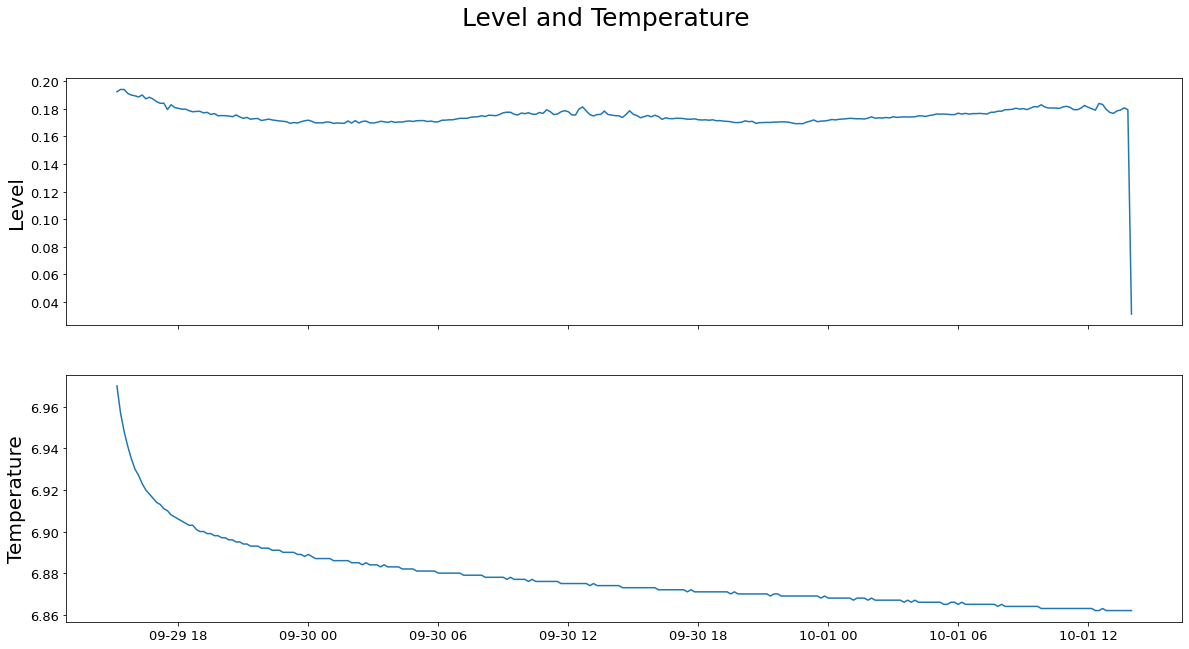

File name: cut_KWR-1_2018_0824_0826.csv


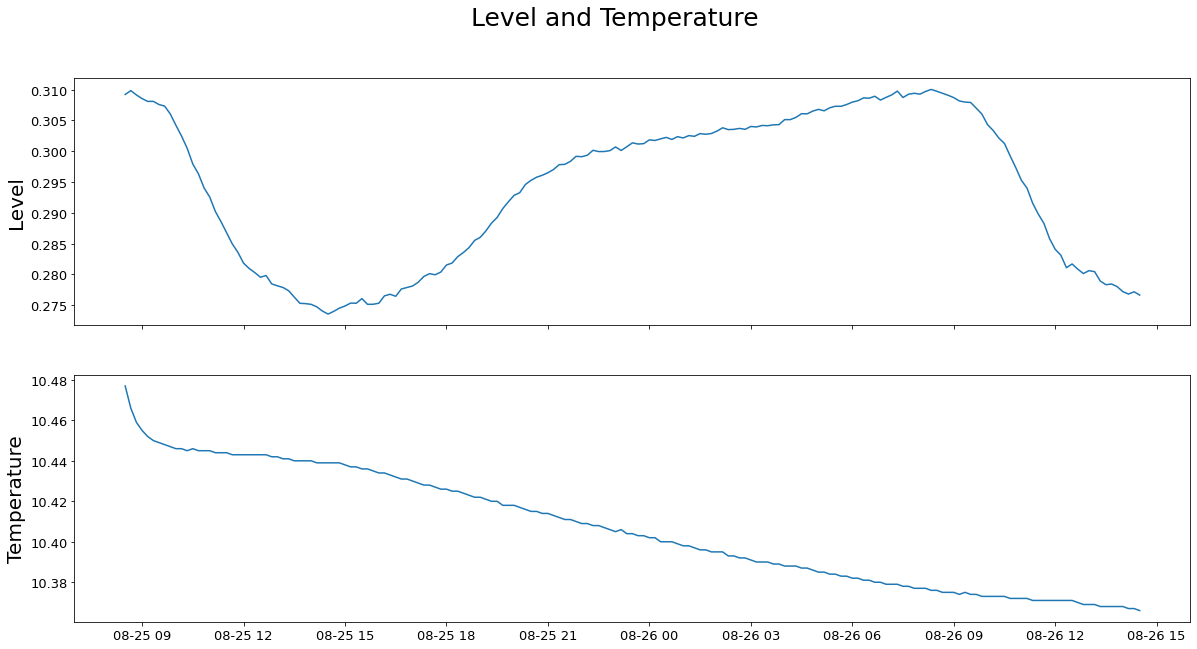

File name: cut_KWR-1_2018_0725_0727.csv


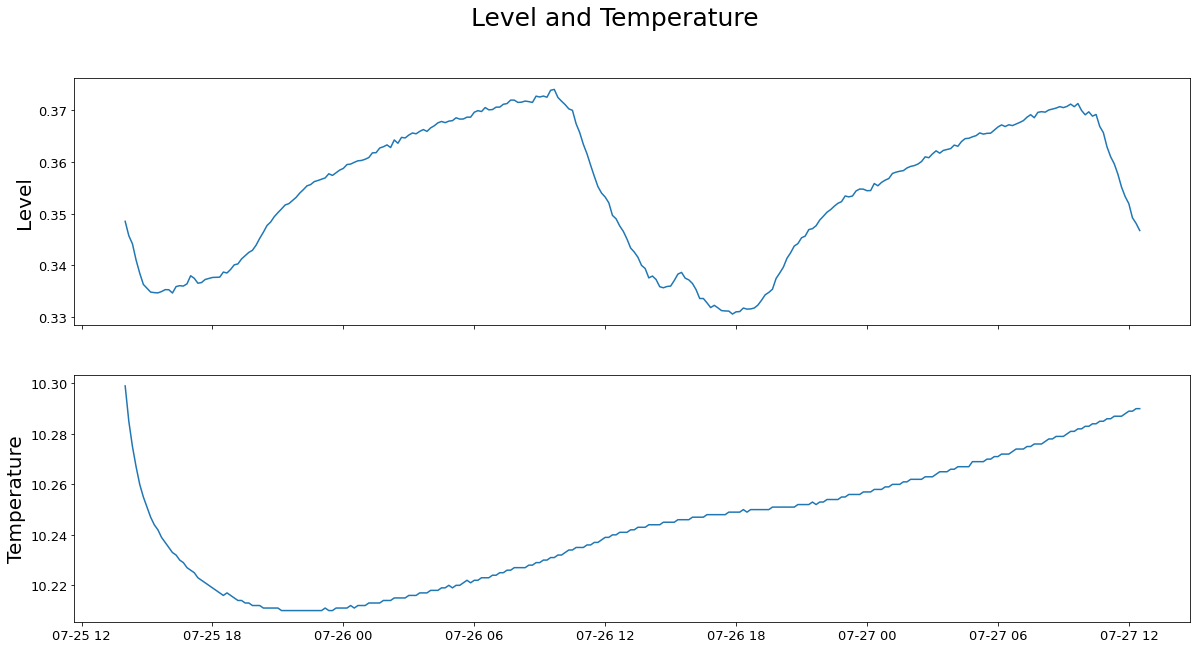

File name: cut_KWR-1_2018_0715_0717.csv


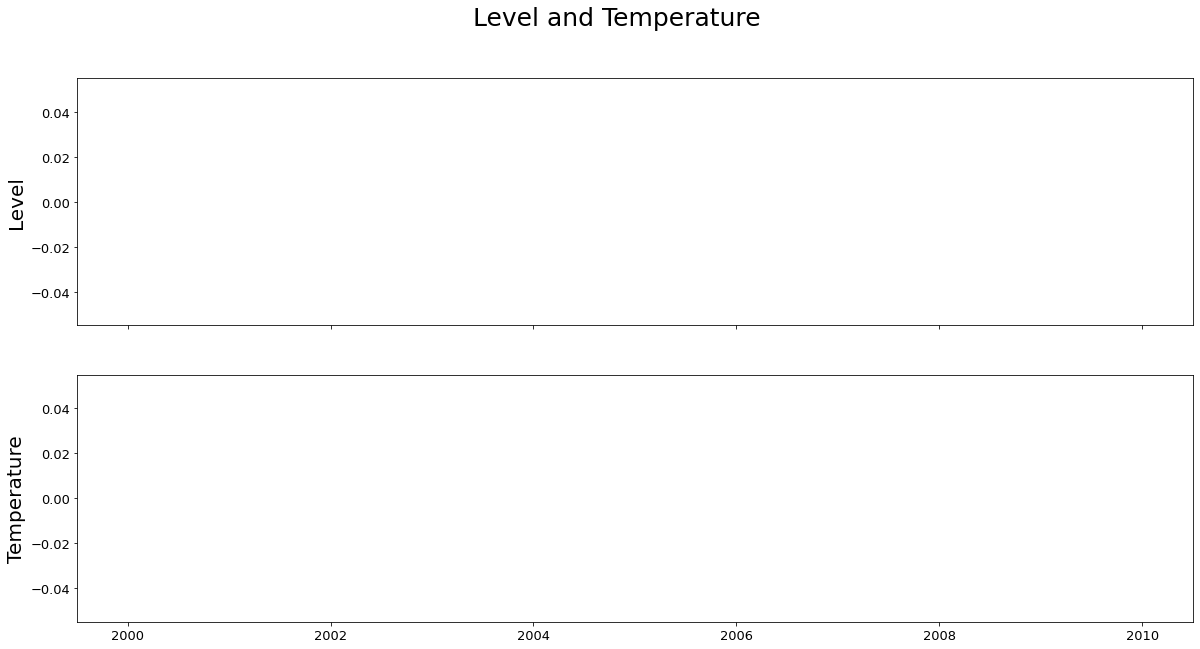

File name: cut_KWR-1_2018_0826_0929.csv


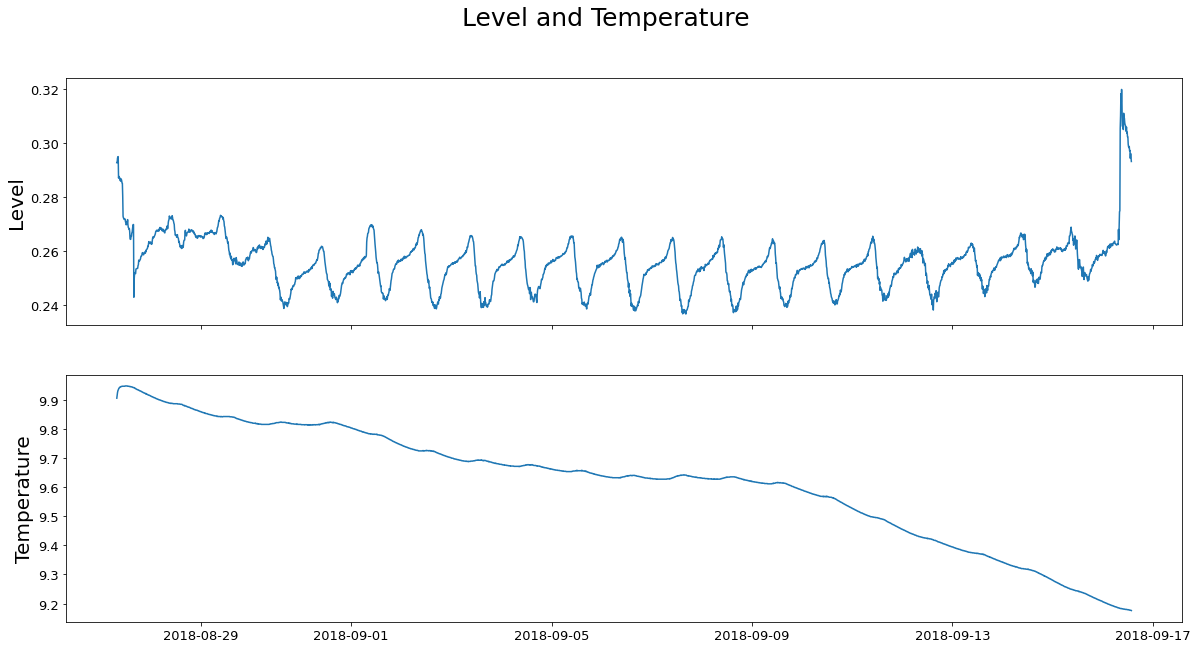

File name: cut_KWR1_2018_1001_1118.csv


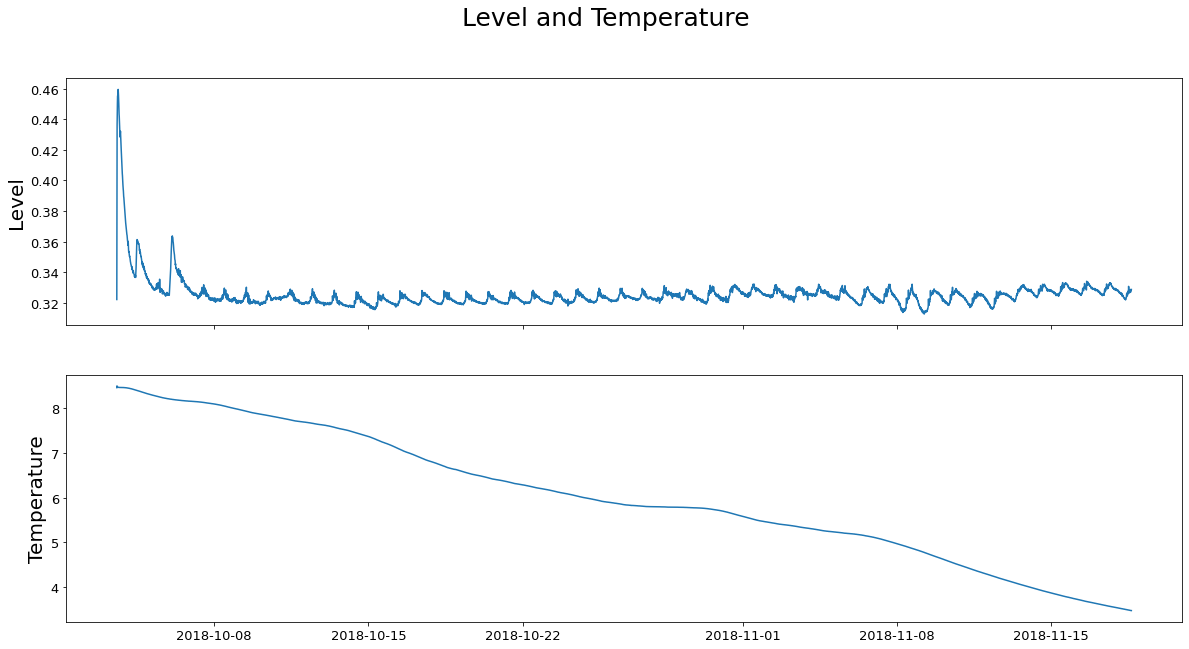

File name: cut_LHR-1_2019_1005_1111.csv


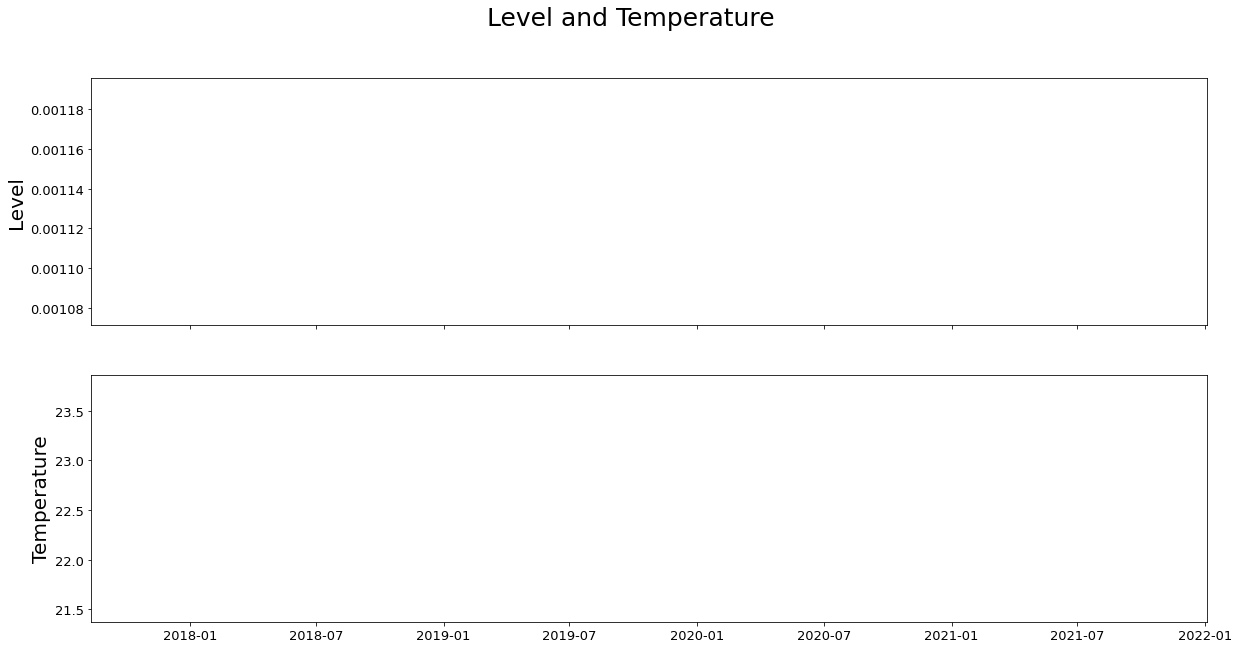

File name: cut_KHF-1_2019_0618_0902.csv


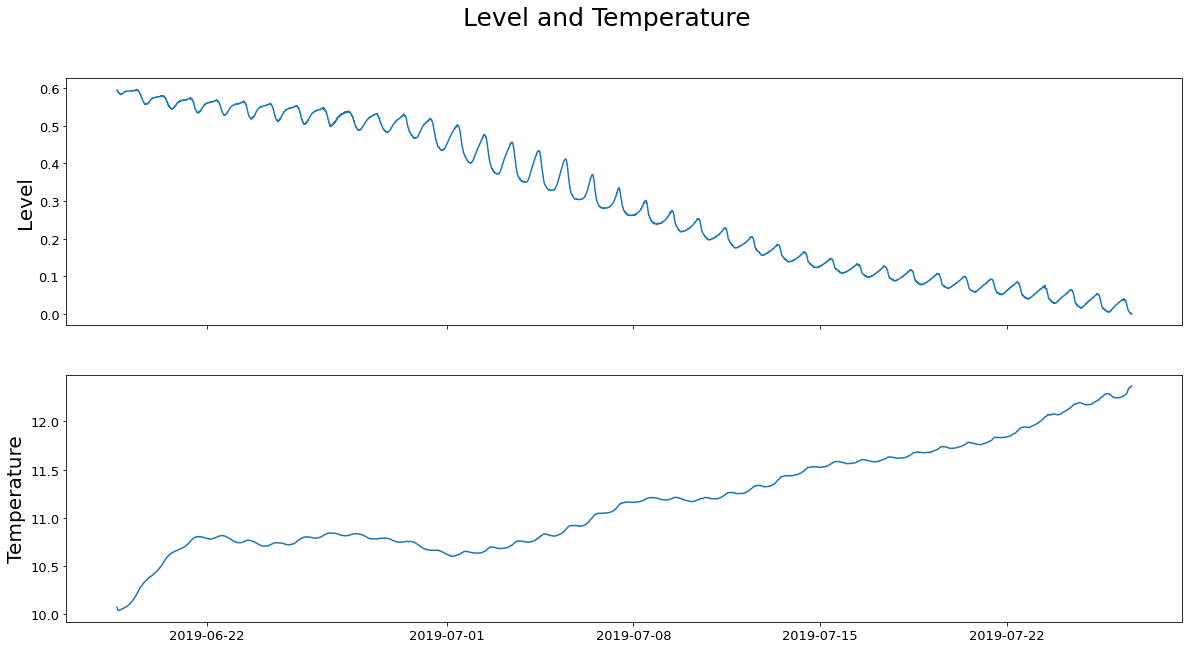

File name: cut_KET-1_2019_0902_1111.csv


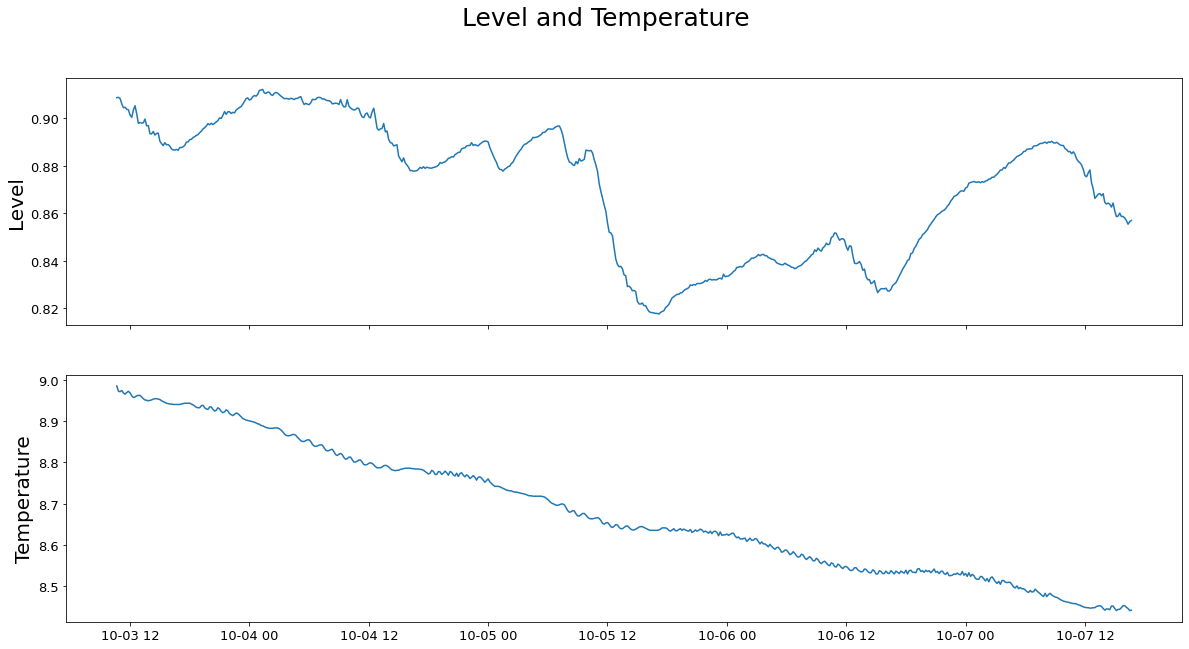

File name: cut_EET-2_2019_0726_1004.csv


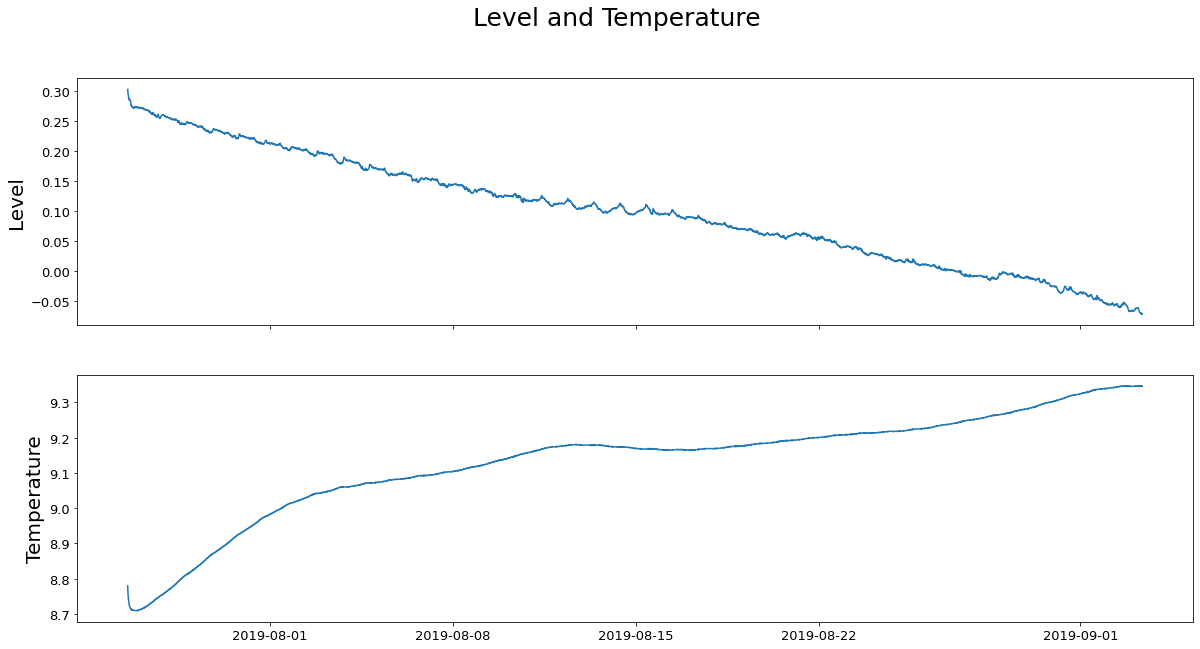

File name: cut_KWT-1_2019_0602_1111.csv


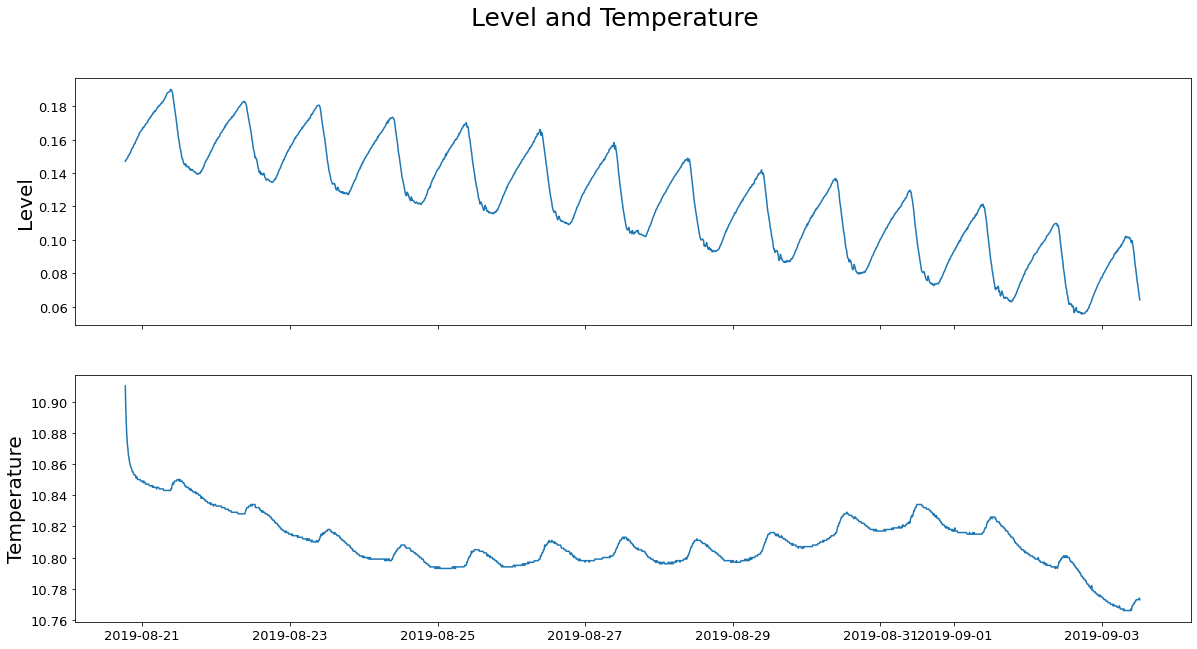

File name: cut_KHT-XE5S_2019_0602_1111.csv


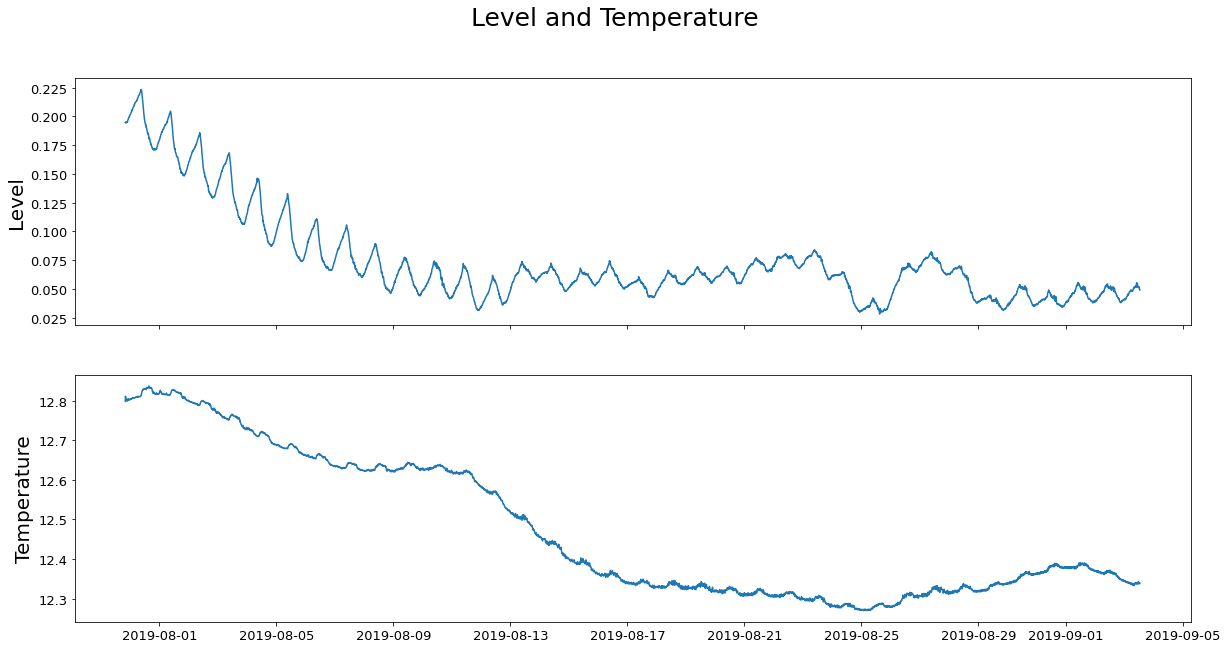

File name: cut_KHF-1_2019_0602_0618.csv


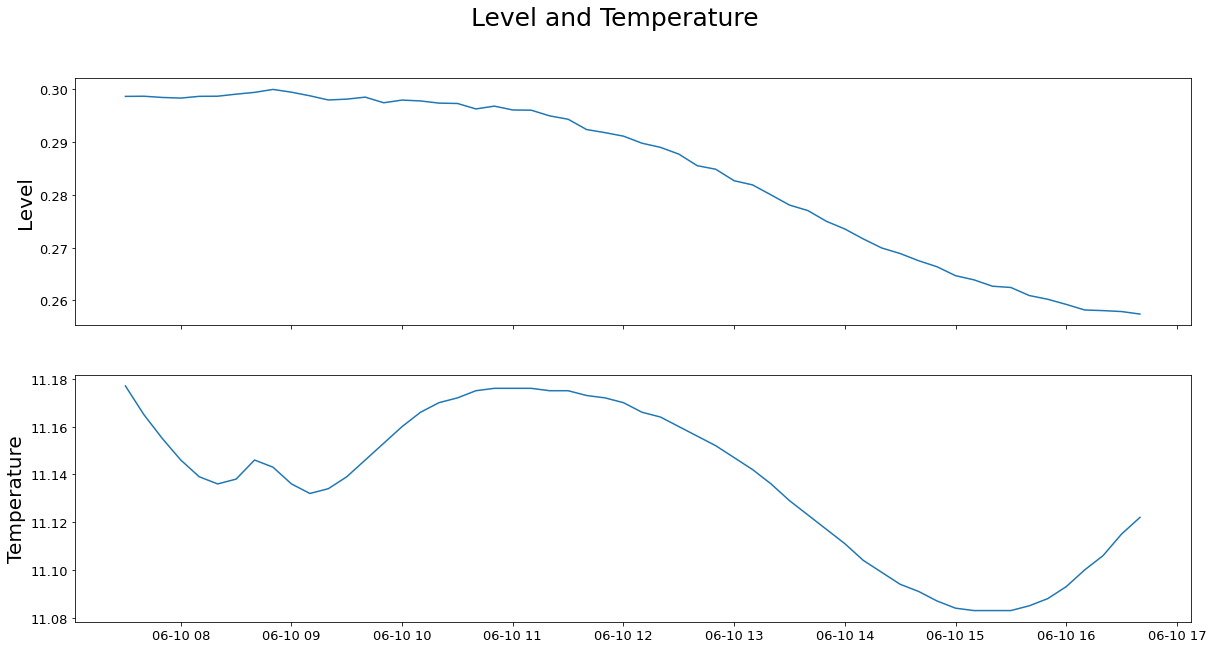

File name: cut_KEF-1_2019_0602_1111.csv


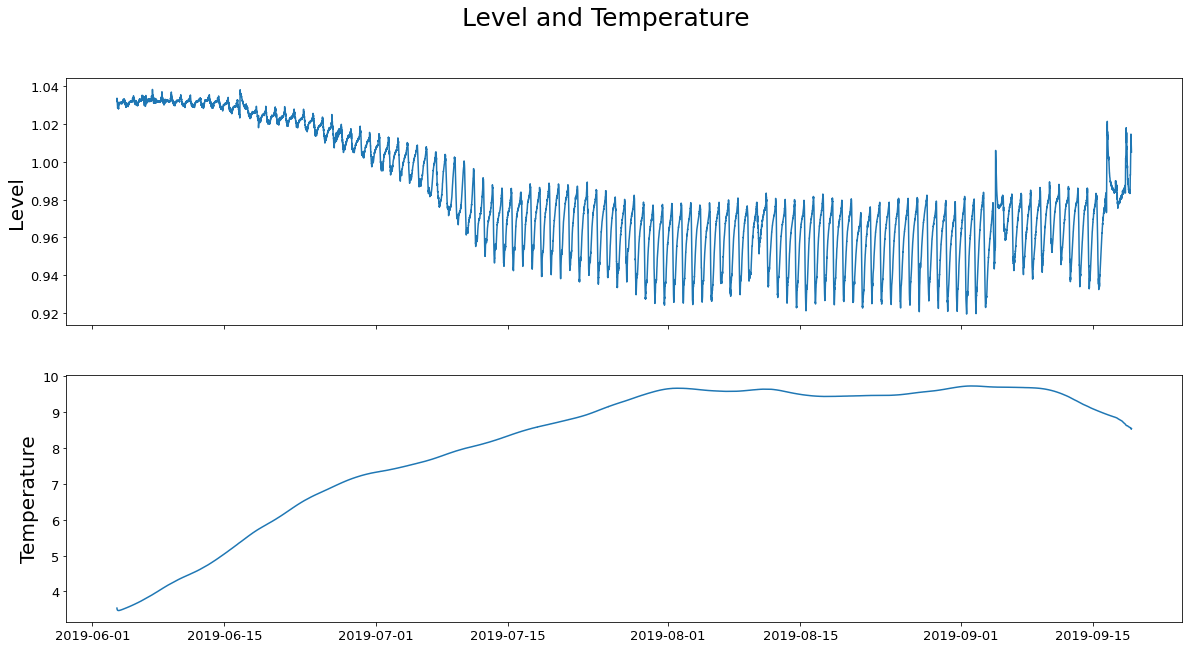

File name: cut_EWT-1_2019_0602_0726.csv


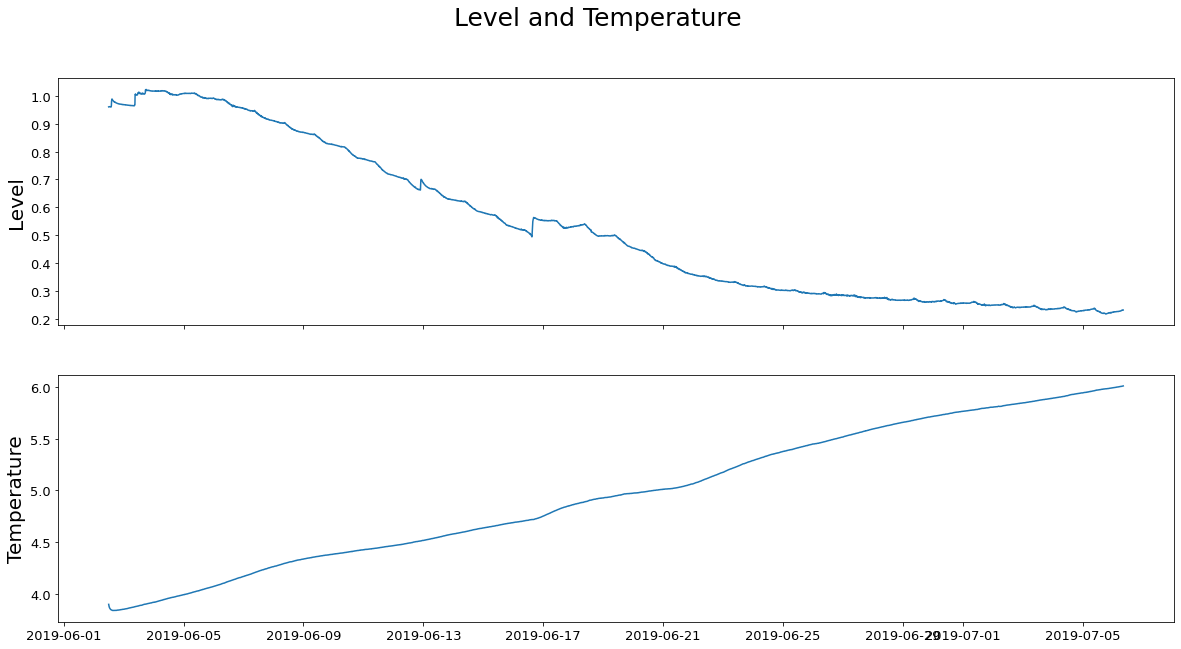

File name: cut_EHT-XA5S_2019_0602_0920.csv


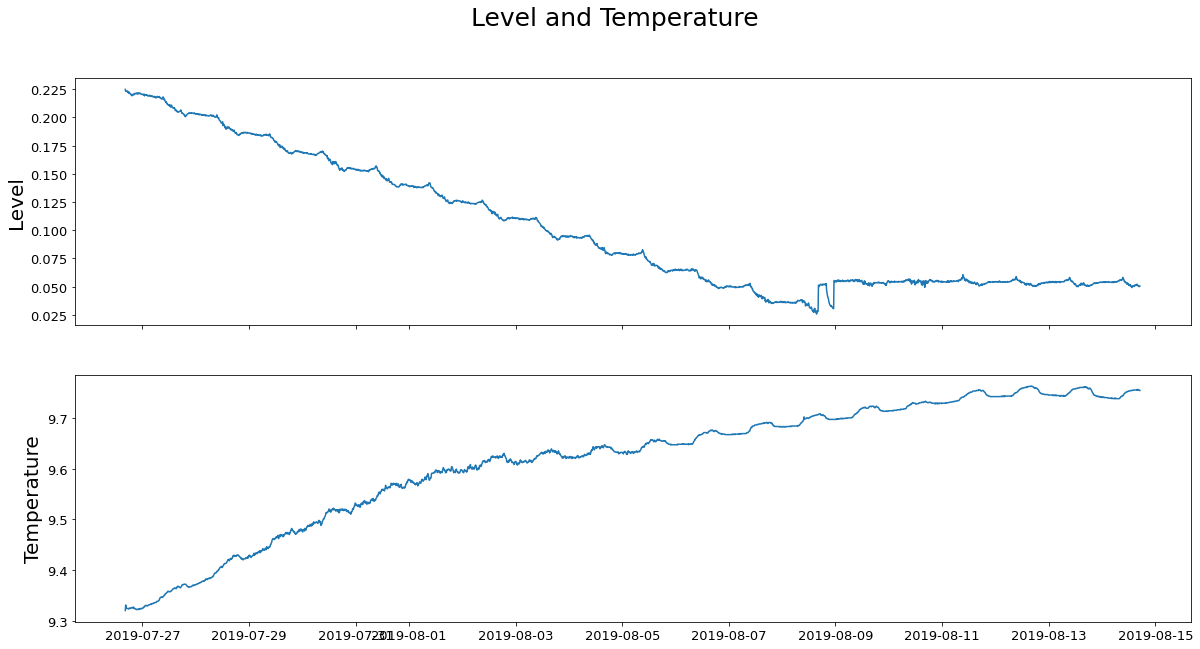

File name: cut_EEF-1_2019_0921_1111.csv


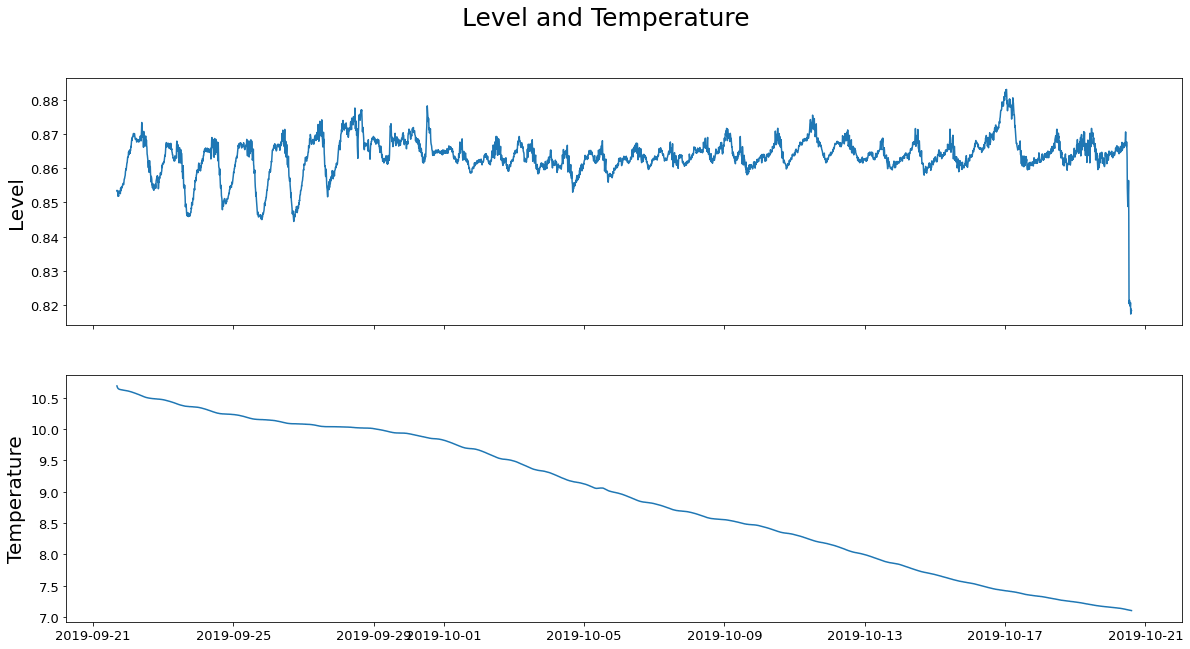

In [9]:
for f in os.listdir('working'):
    if not f.startswith('.'):
        # add the DT column to the gw logger data, and rename the 'LEVEL' column to 'logger LEVEL'
        logger = pd.read_csv('working/' + f, encoding='ISO-8859-1')
        logger['DT'] = pd.to_datetime(logger['Date'] + ' ' + logger['Time'])
        logger['logger LEVEL'] = logger['LEVEL']
        logger = logger.loc[:, ['DT', 'Date', 'Time', 'ms', 'TEMPERATURE', 'logger LEVEL']]
    
        print('File name:', f)

        #merge the 2 data frames, only keeping the relevant rows
        relevant_data = all_baro_data_in_m.merge(logger, how = 'inner', on = 'DT')
    
        #subtract the baro data from the logger data in a column called 'compensated level'
        relevant_data['Compensated Level'] = relevant_data['logger LEVEL'] - relevant_data['baro LEVEL']
        
        #create and save as a csv
        relevant_data.to_csv('all compensated data/' + 'compensated_' + f, encoding='ISO-8859-1')
        
        #plot the compensated level and temperature vs time for each file
        fig, (ax1, ax2) = plt.subplots(figsize=(20, 10), nrows=2, sharex=True)
        ax1.plot(relevant_data['DT'], relevant_data['Compensated Level'])
        ax1.set_ylabel('Level', size=20)
        ax2.plot(relevant_data['DT'], relevant_data['TEMPERATURE'])
        ax2.set_ylabel('Temperature', size=20)

        for tick in ax1.yaxis.get_major_ticks():
            tick.label.set_fontsize(13)
        for tick in ax2.yaxis.get_major_ticks():
            tick.label.set_fontsize(13)
        for tick in ax2.xaxis.get_major_ticks():
            tick.label.set_fontsize(13)

        fig.suptitle('Level and Temperature', size=25)
        plt.show()